In [ ]:
!pip install dask[dataframe]
!pip install tensorflow-addons

INFO: pip is looking at multiple versions of dask-expr to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.2/243.2 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 7.4 MB/s eta 0:00:00
  Attempting uninstall: typeguard
    Found existing installation: typeguard 4.4.1
    Uninstalling typeguard-4.4.1:
      Successfully uninstalled typeguard-4.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
inflect 7.4.0 requires typeguard>=4.0.1, but you have typeguard 2.13.3 which is incompatible.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.stats import mode
from sklearn.metrics import roc_curve, auc

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import xgboost as xgb
import lightgbm as lgb
from imblearn.ensemble import BalancedRandomForestClassifier, EasyEnsembleClassifier
import joblib
from sklearn.feature_selection import SelectFromModel

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import RANSACRegressor
from sklearn.neural_network import MLPClassifier

In [ ]:

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense
from sklearn.utils import class_weight

In [ ]:
from tensorflow.keras.layers import Dense, Dropout, Reshape, MaxPooling1D, GlobalAveragePooling1D, Flatten
from tensorflow.keras.layers import Input
from sklearn.preprocessing import StandardScaler

In [ ]:
from tensorflow.keras.losses import BinaryFocalCrossentropy
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


In [ ]:
previous_application_final = pd.read_csv('/content/drive/MyDrive/UMD/DATA602_DATA_Science/Project/Data Segregator /Code/SavedData/finalized_previous_application.csv')
previous_application = pd.read_csv("/content/drive/MyDrive/UMD/DATA602_DATA_Science/Project/home-credit-default-risk/previous_application.csv")
# previous_application_final = previous_application_final.dropna(subset=['TARGET'])
application_train = pd.read_csv("/content/drive/MyDrive/UMD/DATA602_DATA_Science/Project/home-credit-default-risk/application_train.csv")

In [ ]:
# Drop rows where column 'A' has NaN values
print(previous_application_final.shape)
previous_application_final = previous_application_final.dropna(subset=["TARGET"])
print(previous_application_final.shape)

(1670214, 45)
(1413701, 45)


In [ ]:
previous_application_final.head()

,SK_ID_CURR,vin_num_loans_approved_last_3_months,num_previous_applications_last_3_months,vin_avg_rejections_last_3_months,vin_num_loans_approved_last_6_months,num_previous_applications_last_6_months,vin_avg_rejections_last_6_months,vin_num_loans_approved_last_12_months,num_previous_applications_last_12_months,vin_avg_rejections_last_12_months,...,vin_total_loan_amount_xna_max,vin_total_loan_amount_cash loans_min,vin_total_loan_amount_consumer loans_min,vin_total_loan_amount_revolving loans_min,vin_total_loan_amount_xna_min,vin_total_loan_amount_cash loans_std,vin_total_loan_amount_consumer loans_std,vin_total_loan_amount_revolving loans_std,vin_total_loan_amount_xna_std,TARGET
0,271877,1.0,1.0,NaN,1.0,1.0,NaN,1.0,1.0,NaN,...,NaN,NaN,17145.0,NaN,NaN,NaN,974895.417976,NaN,NaN,0.0
1,108129,NaN,NaN,NaN,1.0,1.0,NaN,1.0,1.0,NaN,...,NaN,512370.0,23688.0,225000.0,NaN,118299.671599,25253.390718,NaN,NaN,0.0
2,122040,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,NaN,...,NaN,0.0,64341.0,90000.0,NaN,96480.831206,NaN,NaN,NaN,0.0
3,176158,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.0,...,NaN,0.0,94689.0,NaN,NaN,181594.251371,NaN,NaN,NaN,0.0
4,202054,NaN,7.0,4.0,NaN,7.0,4.0,4.0,16.0,8.0,...,NaN,0.0,15628.5,90000.0,NaN,269955.605466,35627.886009,NaN,NaN,0.0


In [ ]:
previous_application_final.head()

,SK_ID_CURR,vin_num_loans_approved_last_3_months,num_previous_applications_last_3_months,vin_avg_rejections_last_3_months,vin_num_loans_approved_last_6_months,num_previous_applications_last_6_months,vin_avg_rejections_last_6_months,vin_num_loans_approved_last_12_months,num_previous_applications_last_12_months,vin_avg_rejections_last_12_months,...,vin_total_loan_amount_xna_max,vin_total_loan_amount_cash loans_min,vin_total_loan_amount_consumer loans_min,vin_total_loan_amount_revolving loans_min,vin_total_loan_amount_xna_min,vin_total_loan_amount_cash loans_std,vin_total_loan_amount_consumer loans_std,vin_total_loan_amount_revolving loans_std,vin_total_loan_amount_xna_std,TARGET
0,271877,1.0,1.0,NaN,1.0,1.0,NaN,1.0,1.0,NaN,...,NaN,NaN,17145.0,NaN,NaN,NaN,974895.417976,NaN,NaN,0.0
1,108129,NaN,NaN,NaN,1.0,1.0,NaN,1.0,1.0,NaN,...,NaN,512370.0,23688.0,225000.0,NaN,118299.671599,25253.390718,NaN,NaN,0.0
2,122040,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,NaN,...,NaN,0.0,64341.0,90000.0,NaN,96480.831206,NaN,NaN,NaN,0.0
3,176158,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.0,...,NaN,0.0,94689.0,NaN,NaN,181594.251371,NaN,NaN,NaN,0.0
4,202054,NaN,7.0,4.0,NaN,7.0,4.0,4.0,16.0,8.0,...,NaN,0.0,15628.5,90000.0,NaN,269955.605466,35627.886009,NaN,NaN,0.0


In [ ]:
# X = previous_application_final.copy()
categorical_cols = previous_application.select_dtypes(include=['object']).columns
categorical_cols

Index(['NAME_CONTRACT_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON',
       'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY',
       'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE',
       'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')

In [ ]:
label_encoder = LabelEncoder()

for col in categorical_cols:
    previous_application[col] = label_encoder.fit_transform(previous_application[col].astype(str))


In [ ]:
aggregation_functions = {}
for col in previous_application_final.columns:
    if col != 'SK_ID_CURR' and col != 'SK_ID_PREV':
        aggregation_functions[col] = ['mean', 'sum', 'min', 'max']
previous_application_final_aggr = previous_application_final.groupby('SK_ID_CURR').agg(aggregation_functions)
previous_application_final_aggr.columns = ['_'.join(col).strip() for col in previous_application_final_aggr.columns.values]
previous_application_final_aggr.reset_index(inplace=True)
previous_application_final_aggr.head()

,SK_ID_CURR,vin_num_loans_approved_last_3_months_mean,vin_num_loans_approved_last_3_months_sum,vin_num_loans_approved_last_3_months_min,vin_num_loans_approved_last_3_months_max,num_previous_applications_last_3_months_mean,num_previous_applications_last_3_months_sum,num_previous_applications_last_3_months_min,num_previous_applications_last_3_months_max,vin_avg_rejections_last_3_months_mean,...,vin_total_loan_amount_revolving loans_std_min,vin_total_loan_amount_revolving loans_std_max,vin_total_loan_amount_xna_std_mean,vin_total_loan_amount_xna_std_sum,vin_total_loan_amount_xna_std_min,vin_total_loan_amount_xna_std_max,TARGET_mean,TARGET_sum,TARGET_min,TARGET_max
0,100002,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,1.0,1.0,1.0,1.0
1,100003,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0
2,100004,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0
3,100006,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,190918.83092,190918.83092,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0
4,100007,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0


In [ ]:
# Drop the identifier column before feature selection
y = previous_application_final_aggr['TARGET_max']  # Target variable
X = previous_application_final_aggr.drop(columns=['TARGET_mean', 'TARGET_sum','TARGET_min', 'TARGET_max', 'SK_ID_CURR']) # Features excluding the identifier


In [ ]:
X

,vin_num_loans_approved_last_3_months_mean,vin_num_loans_approved_last_3_months_sum,vin_num_loans_approved_last_3_months_min,vin_num_loans_approved_last_3_months_max,num_previous_applications_last_3_months_mean,num_previous_applications_last_3_months_sum,num_previous_applications_last_3_months_min,num_previous_applications_last_3_months_max,vin_avg_rejections_last_3_months_mean,vin_avg_rejections_last_3_months_sum,...,vin_total_loan_amount_consumer loans_std_min,vin_total_loan_amount_consumer loans_std_max,vin_total_loan_amount_revolving loans_std_mean,vin_total_loan_amount_revolving loans_std_sum,vin_total_loan_amount_revolving loans_std_min,vin_total_loan_amount_revolving loans_std_max,vin_total_loan_amount_xna_std_mean,vin_total_loan_amount_xna_std_sum,vin_total_loan_amount_xna_std_min,vin_total_loan_amount_xna_std_max
0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,0.0,NaN,NaN
1,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,...,198402.849092,198402.849092,NaN,0.000000e+00,NaN,NaN,NaN,0.0,NaN,NaN
2,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,0.0,NaN,NaN
3,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,...,172329.700750,172329.700750,190918.83092,1.718269e+06,190918.83092,190918.83092,NaN,0.0,NaN,NaN
4,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,...,11346.942518,11346.942518,NaN,0.000000e+00,NaN,NaN,NaN,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291052,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,0.0,NaN,NaN
291053,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,0.0,NaN,NaN
291054,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,...,9447.300150,9447.300150,NaN,0.000000e+00,NaN,NaN,NaN,0.0,NaN,NaN
291055,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,...,159783.151578,159783.151578,NaN,0.000000e+00,NaN,NaN,NaN,0.0,NaN,NaN


In [ ]:
# Feature selection using RandomForest to determine important features
feature_selector = RandomForestClassifier(n_estimators=100, random_state=42)
feature_selector.fit(X, y)
selector = SelectFromModel(feature_selector, threshold='median', prefit=True)
X_selected = selector.transform(X)

X_selected_df = pd.DataFrame(X_selected, columns=X.columns[selector.get_support()])
X_selected_df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


,num_previous_applications_last_6_months_sum,vin_num_loans_approved_last_12_months_sum,num_previous_applications_last_12_months_mean,num_previous_applications_last_12_months_sum,num_previous_applications_last_12_months_min,num_previous_applications_last_12_months_max,vin_num_loans_approved_last_24_months_sum,num_previous_applications_last_24_months_mean,num_previous_applications_last_24_months_sum,num_previous_applications_last_24_months_min,...,vin_total_loan_amount_consumer loans_min_min,vin_total_loan_amount_consumer loans_min_max,vin_total_loan_amount_cash loans_std_mean,vin_total_loan_amount_cash loans_std_sum,vin_total_loan_amount_cash loans_std_min,vin_total_loan_amount_cash loans_std_max,vin_total_loan_amount_consumer loans_std_mean,vin_total_loan_amount_consumer loans_std_sum,vin_total_loan_amount_consumer loans_std_min,vin_total_loan_amount_consumer loans_std_max
0,0.0,0.0,NaN,0.0,NaN,NaN,1.0,1.0,1.0,1.0,...,179055.0,179055.0,NaN,0.000000e+00,NaN,NaN,NaN,0.000000e+00,NaN,NaN
1,0.0,0.0,NaN,0.0,NaN,NaN,0.0,NaN,0.0,NaN,...,68053.5,68053.5,NaN,0.000000e+00,NaN,NaN,198402.849092,5.952085e+05,198402.849092,198402.849092
2,0.0,0.0,NaN,0.0,NaN,NaN,0.0,NaN,0.0,NaN,...,20106.0,20106.0,NaN,0.000000e+00,NaN,NaN,NaN,0.000000e+00,NaN,NaN
3,0.0,27.0,7.0,63.0,7.0,7.0,45.0,9.0,81.0,9.0,...,24219.0,24219.0,405625.654916,3.650631e+06,405625.654916,405625.654916,172329.700750,1.550967e+06,172329.700750,172329.700750
4,0.0,0.0,NaN,0.0,NaN,NaN,6.0,1.0,6.0,1.0,...,14616.0,14616.0,49403.587477,2.964215e+05,49403.587477,49403.587477,11346.942518,6.808166e+04,11346.942518,11346.942518


In [ ]:
X_selected_df.fillna(-(10e10-1), inplace=True)

In [ ]:
X_selected_df.head()

,num_previous_applications_last_6_months_sum,vin_num_loans_approved_last_12_months_sum,num_previous_applications_last_12_months_mean,num_previous_applications_last_12_months_sum,num_previous_applications_last_12_months_min,num_previous_applications_last_12_months_max,vin_num_loans_approved_last_24_months_sum,num_previous_applications_last_24_months_mean,num_previous_applications_last_24_months_sum,num_previous_applications_last_24_months_min,...,vin_total_loan_amount_consumer loans_min_min,vin_total_loan_amount_consumer loans_min_max,vin_total_loan_amount_cash loans_std_mean,vin_total_loan_amount_cash loans_std_sum,vin_total_loan_amount_cash loans_std_min,vin_total_loan_amount_cash loans_std_max,vin_total_loan_amount_consumer loans_std_mean,vin_total_loan_amount_consumer loans_std_sum,vin_total_loan_amount_consumer loans_std_min,vin_total_loan_amount_consumer loans_std_max
0,0.0,0.0,-1.000000e+11,0.0,-1.000000e+11,-1.000000e+11,1.0,1.000000e+00,1.0,1.000000e+00,...,179055.0,179055.0,-1.000000e+11,0.000000e+00,-1.000000e+11,-1.000000e+11,-1.000000e+11,0.000000e+00,-1.000000e+11,-1.000000e+11
1,0.0,0.0,-1.000000e+11,0.0,-1.000000e+11,-1.000000e+11,0.0,-1.000000e+11,0.0,-1.000000e+11,...,68053.5,68053.5,-1.000000e+11,0.000000e+00,-1.000000e+11,-1.000000e+11,1.984028e+05,5.952085e+05,1.984028e+05,1.984028e+05
2,0.0,0.0,-1.000000e+11,0.0,-1.000000e+11,-1.000000e+11,0.0,-1.000000e+11,0.0,-1.000000e+11,...,20106.0,20106.0,-1.000000e+11,0.000000e+00,-1.000000e+11,-1.000000e+11,-1.000000e+11,0.000000e+00,-1.000000e+11,-1.000000e+11
3,0.0,27.0,7.000000e+00,63.0,7.000000e+00,7.000000e+00,45.0,9.000000e+00,81.0,9.000000e+00,...,24219.0,24219.0,4.056257e+05,3.650631e+06,4.056257e+05,4.056257e+05,1.723297e+05,1.550967e+06,1.723297e+05,1.723297e+05
4,0.0,0.0,-1.000000e+11,0.0,-1.000000e+11,-1.000000e+11,6.0,1.000000e+00,6.0,1.000000e+00,...,14616.0,14616.0,4.940359e+04,2.964215e+05,4.940359e+04,4.940359e+04,1.134694e+04,6.808166e+04,1.134694e+04,1.134694e+04


In [ ]:
class ModelClassifier:
    def __init__(self, y_train):
        self.class_weight = self.calculate_class_weights(y_train)
        self.models = self.define_model_classifiers()

    def calculate_class_weights(self, y_train):
        return {0: len(y_train) / (2 * len(y_train[y_train == 0])),
                1: len(y_train) / (2 * len(y_train[y_train == 1]))}

    def define_model_classifiers(self):
        models = {
            "RandomForest": RandomForestClassifier(class_weight=self.class_weight, random_state=42),
            "GradientBoosting": GradientBoostingClassifier(random_state=42),
            "XGBoost": xgb.XGBClassifier(scale_pos_weight=self.class_weight[0] / self.class_weight[1]),
            "LightGBM": lgb.LGBMClassifier(is_unbalance=True)
        }
        return models

    def train_and_evaluate(self, X_train, X_test, y_train, y_test):
        for model_name, model in self.models.items():
            print(f"Training and evaluating {model_name}...")
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

            # Save model weights
            joblib.dump(model, f"{model_name}_model.pkl")

            # Print classification report
            print(f"{model_name} - Classification Report:")
            print(classification_report(y_test, y_pred))

            # Calculate and print ROC-AUC score if available
            if y_pred_proba is not None:
                roc_auc = roc_auc_score(y_test, y_pred_proba)
                print(f"{model_name} - ROC-AUC Score: {roc_auc}\n")
            else:
                print(f"{model_name} - ROC-AUC Score: Not applicable\n")

            # Confusion Matrix
            cm = confusion_matrix(y_test, y_pred)
            plt.figure(figsize=(8, 6))
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
            plt.xlabel('Predicted')
            plt.ylabel('Actual')
            plt.title(f'Confusion Matrix for {model_name}')
            plt.show()

            # ROC Curve if probabilities are available
            if y_pred_proba is not None:
                from sklearn.metrics import roc_curve, auc
                fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
                roc_auc = auc(fpr, tpr)
                plt.figure(figsize=(10, 6))
                plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
                plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
                plt.xlabel('False Positive Rate')
                plt.ylabel('True Positive Rate')
                plt.title(f'Receiver Operating Characteristic - {model_name}')
                plt.legend(loc='lower right')
                plt.show()


In [ ]:

# # Neural network model class with 3 layers
# class NeuralNetworkClassifier:
#     def __init__(self, input_dim, y_train):
#         self.class_weight = self.calculate_class_weights(y_train)
#         self.model = self.build_model(input_dim)

#     def calculate_class_weights(self, y_train):
#         return {0: len(y_train) / (2 * len(y_train[y_train == 0])),
#                 1: len(y_train) / (2 * len(y_train[y_train == 1]))}

#     def build_model(self, input_dim):
#         model = Sequential()
#         model.add(Dense(128, input_dim=input_dim, activation='relu'))
#         model.add(Dense(64, activation='relu'))
#         model.add(Dense(1, activation='sigmoid'))
#         model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#         return model

#     def train_and_evaluate(self, X_train, X_test, y_train, y_test, epochs=50, batch_size=32):
#         print("Training and evaluating Neural Network...")

#         history = self.model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test), verbose=1, class_weight=self.class_weight)

#         # Evaluate the model
#         loss, accuracy = self.model.evaluate(X_test, y_test, verbose=0)
#         print(f"Neural Network - Accuracy: {accuracy}\n")

#         # Predict probabilities and calculate ROC-AUC score
#         y_pred_proba = self.model.predict(X_test)
#         roc_auc = roc_auc_score(y_test, y_pred_proba)
#         print(f"Neural Network - ROC-AUC Score: {roc_auc}\n")

#         # Confusion Matrix
#         y_pred = (y_pred_proba > 0.5).astype(int)
#         cm = confusion_matrix(y_test, y_pred)
#         plt.figure(figsize=(8, 6))
#         sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
#         plt.xlabel('Predicted')
#         plt.ylabel('Actual')
#         plt.title('Confusion Matrix for Neural Network')
#         plt.show()

#         # ROC Curve
#         from sklearn.metrics import roc_curve, auc
#         fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
#         roc_auc = auc(fpr, tpr)
#         plt.figure(figsize=(10, 6))
#         plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
#         plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
#         plt.xlabel('False Positive Rate')
#         plt.ylabel('True Positive Rate')
#         plt.title('Receiver Operating Characteristic - Neural Network')
#         plt.legend(loc='lower right')
#         plt.show()

Training and evaluating RandomForest...
RandomForest - Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     26753
         1.0       0.15      0.01      0.01      2353

    accuracy                           0.92     29106
   macro avg       0.54      0.50      0.48     29106
weighted avg       0.86      0.92      0.88     29106

RandomForest - ROC-AUC Score: 0.5773273990394475



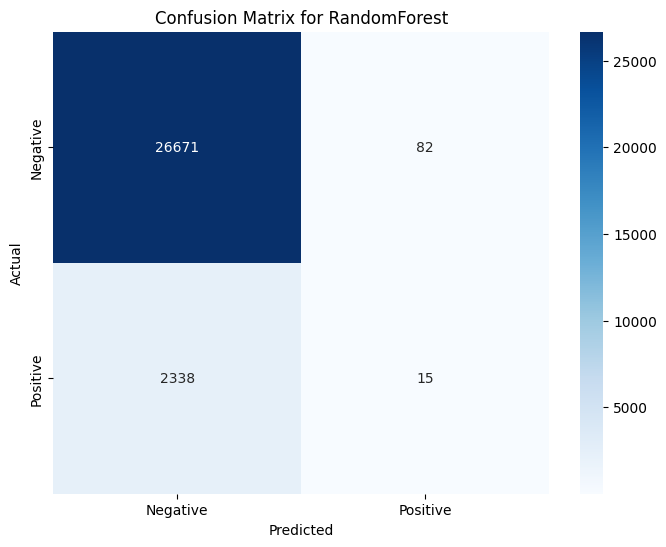

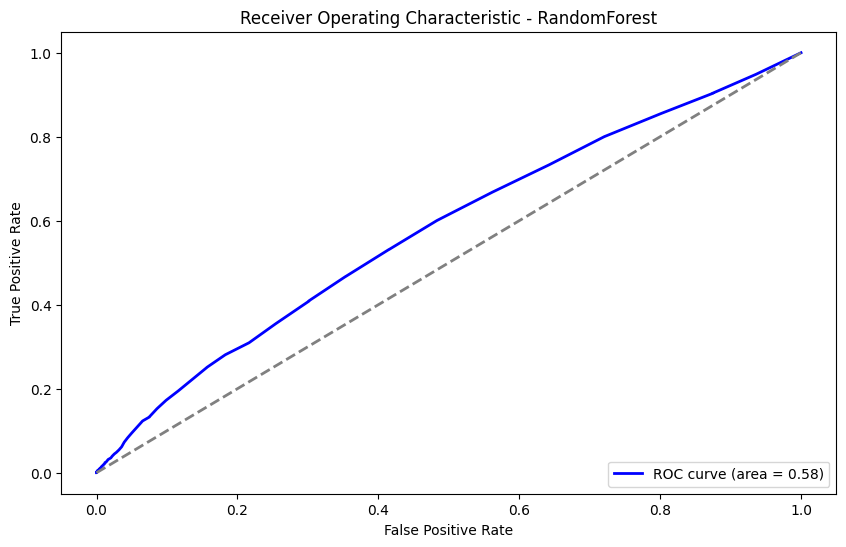

Training and evaluating GradientBoosting...
GradientBoosting - Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     26753
         1.0       0.00      0.00      0.00      2353

    accuracy                           0.92     29106
   macro avg       0.46      0.50      0.48     29106
weighted avg       0.84      0.92      0.88     29106

GradientBoosting - ROC-AUC Score: 0.6138977006268598



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


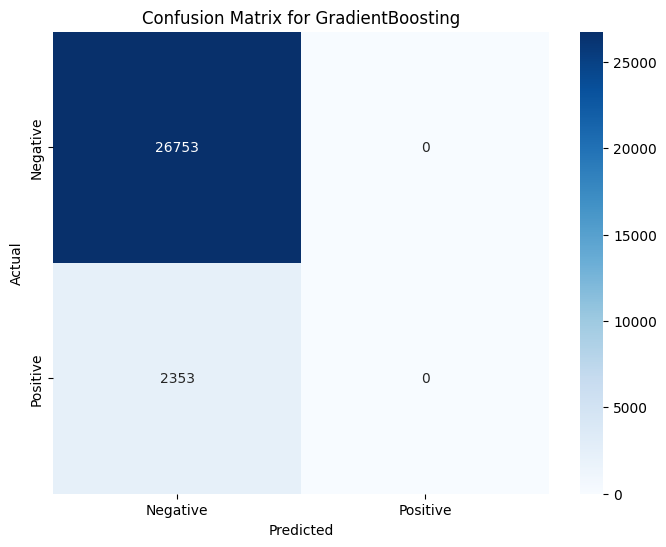

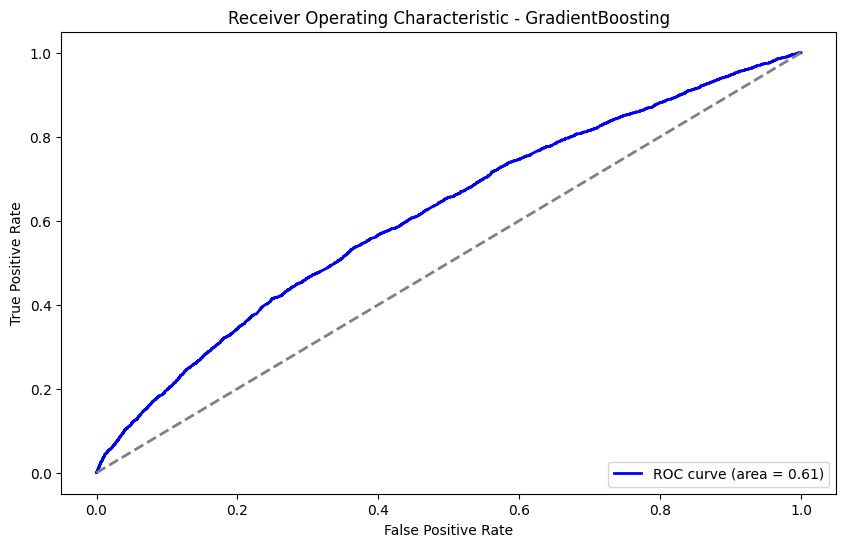

Training and evaluating XGBoost...
XGBoost - Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     26753
         1.0       0.00      0.00      0.00      2353

    accuracy                           0.92     29106
   macro avg       0.46      0.50      0.48     29106
weighted avg       0.84      0.92      0.88     29106

XGBoost - ROC-AUC Score: 0.6179915176549622



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


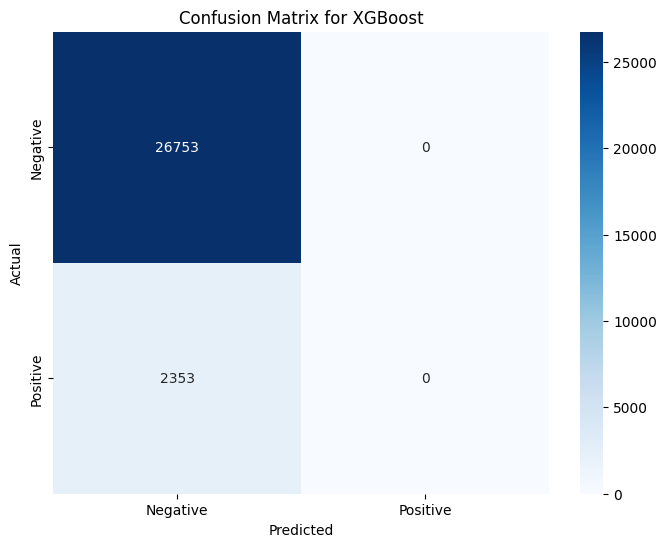

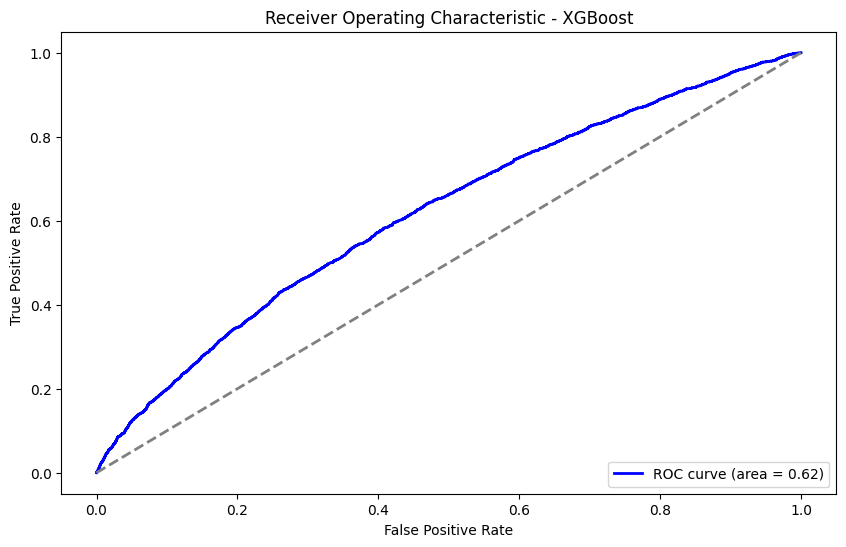

Training and evaluating LightGBM...
[LightGBM] [Info] Number of positive: 21492, number of negative: 240459
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.326867 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 19487
[LightGBM] [Info] Number of data points in the train set: 261951, number of used features: 86
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.082046 -> initscore=-2.414869
[LightGBM] [Info] Start training from score -2.414869
LightGBM - Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.64      0.76     26753
         1.0       0.11      0.52      0.19      2353

    accuracy                           0.63     29106
   macro avg       0.53      0.58      0.47     29106
weighted avg       0.87      0.63      0.71     29106

LightGBM - ROC-AUC Score: 0.6089084003416119



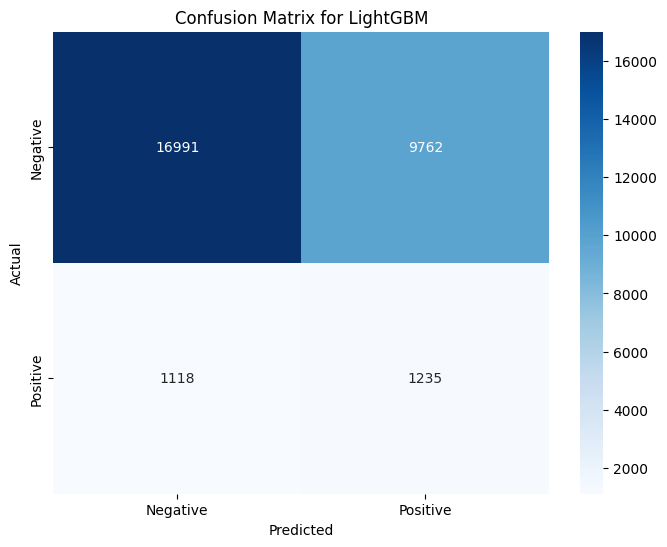

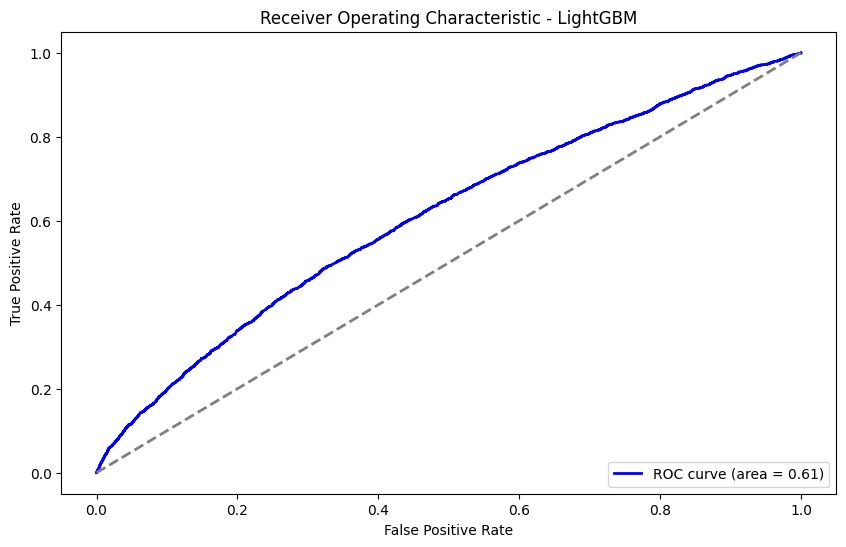

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.1, random_state=42)
model_classifier = ModelClassifier(y_train)
model_classifier.train_and_evaluate(X_train, X_test, y_train, y_test)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training and evaluating Neural Network...
Epoch 1/50
8186/8186 ━━━━━━━━━━━━━━━━━━━━ 31s 3ms/step - accuracy: 0.5117 - loss: 706352256.0000 - val_accuracy: 0.3376 - val_loss: 5485056.0000
Epoch 2/50
8186/8186 ━━━━━━━━━━━━━━━━━━━━ 31s 2ms/step - accuracy: 0.6323 - loss: 2691669.0000 - val_accuracy: 0.8694 - val_loss: 10121.1348
Epoch 3/50
8186/8186 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.8473 - loss: 47115.3320 - val_accuracy: 0.9192 - val_loss: 0.6904
Epoch 4/50
8186/8186 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.5564 - loss: 1.2383 - val_accuracy: 0.9192 - val_loss: 0.6816
Epoch 5/50
8186/8186 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.6140 - loss: 0.6947 - val_accuracy: 0.0808 - val_loss: 0.6982
Epoch 6/50
8186/8186 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.6582 - loss: 0.6880 - val_accuracy: 0.5814 - val_loss: 0.6972
Epoch 7/50
8186/8186 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.5878 - loss: 0.6894 - val_accuracy: 0.5814 - val_loss: 0.6894
Epoch 8/50
81

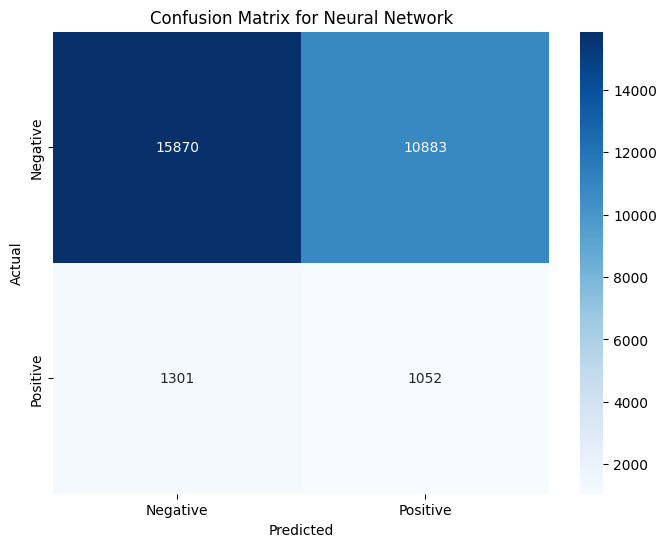

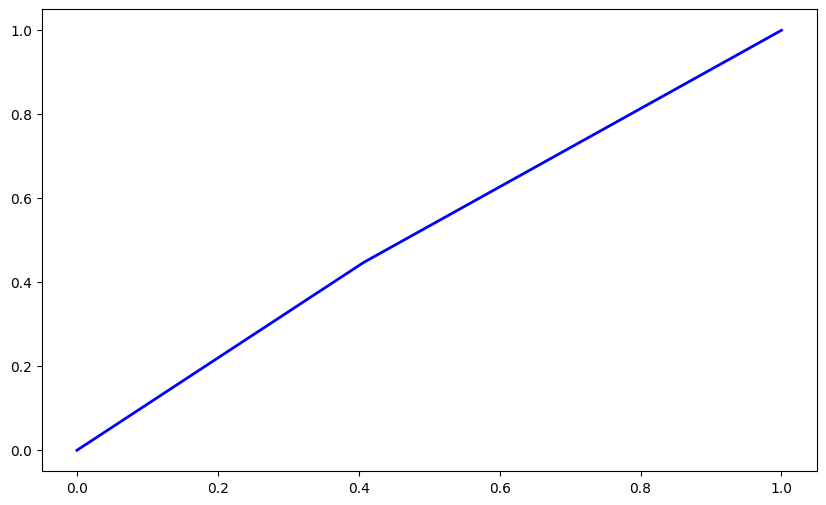

In [ ]:
# # Initialize and train/evaluate NeuralNetworkClassifier
# # Neural network model class with 3 layers
# class NeuralNetworkClassifier:
#     def __init__(self, input_dim, y_train):
#         self.class_weight = self.calculate_class_weights(y_train)
#         self.model = self.build_model(input_dim)

#     def calculate_class_weights(self, y_train):
#         # Convert y_train to NumPy array to ensure correct indexing
#         y_train_np = y_train.to_numpy()
#         return {0: len(y_train_np) / (2 * len(y_train_np[y_train_np == 0])),
#                 1: len(y_train_np) / (2 * len(y_train_np[y_train_np == 1]))}

#     def build_model(self, input_dim):
#         model = Sequential()
#         model.add(Dense(128, input_dim=input_dim, activation='relu'))
#         model.add(Dense(64, activation='relu'))
#         model.add(Dense(1, activation='sigmoid'))
#         model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#         return model

#     def train_and_evaluate(self, X_train, X_test, y_train, y_test, epochs=50, batch_size=32):
#         print("Training and evaluating Neural Network...")

#         # Convert y_train and y_test to NumPy arrays for compatibility with Keras
#         y_train_np = y_train.to_numpy()
#         y_test_np = y_test.to_numpy()

#         history = self.model.fit(X_train, y_train_np, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test_np), verbose=1, class_weight=self.class_weight)

#         # Evaluate the model
#         loss, accuracy = self.model.evaluate(X_test, y_test_np, verbose=0)
#         print(f"Neural Network - Accuracy: {accuracy}\n")

#         # Predict probabilities and calculate ROC-AUC score
#         y_pred_proba = self.model.predict(X_test)
#         roc_auc = roc_auc_score(y_test_np, y_pred_proba)
#         print(f"Neural Network - ROC-AUC Score: {roc_auc}\n")

#         # Confusion Matrix
#         y_pred = (y_pred_proba > 0.5).astype(int)
#         cm = confusion_matrix(y_test_np, y_pred)
#         plt.figure(figsize=(8, 6))
#         sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
#         plt.xlabel('Predicted')
#         plt.ylabel('Actual')
#         plt.title('Confusion Matrix for Neural Network')
#         plt.show()

#         # ROC Curve
#         from sklearn.metrics import roc_curve, auc
#         fpr, tpr, _ = roc_curve(y_test_np, y_pred_proba)
#         roc_auc = auc(fpr, tpr)
#         plt.figure(figsize=(10, 6))
#         plt.plot(fpr, tpr, color='blue', lw=2)
# input_dim = X_train.shape[1]
# neural_network_classifier = NeuralNetworkClassifier(input_dim, y_train)
# neural_network_classifier.train_and_evaluate(X_train, X_test, y_train, y_test)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training and evaluating Neural Network...
Epoch 1/50
8186/8186 ━━━━━━━━━━━━━━━━━━━━ 27s 3ms/step - accuracy: 0.5015 - loss: 548387520.0000 - val_accuracy: 0.0808 - val_loss: 0.7024
Epoch 2/50


/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/model_checkpoint.py:206: UserWarning: Can save best model only with val_custom_metric available, skipping.
  self._save_model(epoch=epoch, batch=None, logs=logs)


8186/8186 ━━━━━━━━━━━━━━━━━━━━ 39s 3ms/step - accuracy: 0.2175 - loss: 294515.0000 - val_accuracy: 0.9192 - val_loss: 0.6865
Epoch 3/50
8186/8186 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - accuracy: 0.4961 - loss: 483885.3125 - val_accuracy: 0.9192 - val_loss: 0.6820
Epoch 4/50
8186/8186 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - accuracy: 0.6398 - loss: 240.2144 - val_accuracy: 0.0808 - val_loss: 0.6938
Epoch 5/50
8186/8186 ━━━━━━━━━━━━━━━━━━━━ 24s 3ms/step - accuracy: 0.6070 - loss: 6194.9614 - val_accuracy: 0.9192 - val_loss: 0.6871
Epoch 6/50
8186/8186 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - accuracy: 0.5437 - loss: 19.0829 - val_accuracy: 0.9192 - val_loss: 0.6839
Epoch 7/50
8186/8186 ━━━━━━━━━━━━━━━━━━━━ 42s 3ms/step - accuracy: 0.7037 - loss: 477.6454 - val_accuracy: 0.9192 - val_loss: 0.6926
Epoch 8/50
8186/8186 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - accuracy: 0.6635 - loss: 67235.3984 - val_accuracy: 0.0808 - val_loss: 0.7100
Epoch 9/50
8186/8186 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - accuracy: 0.268

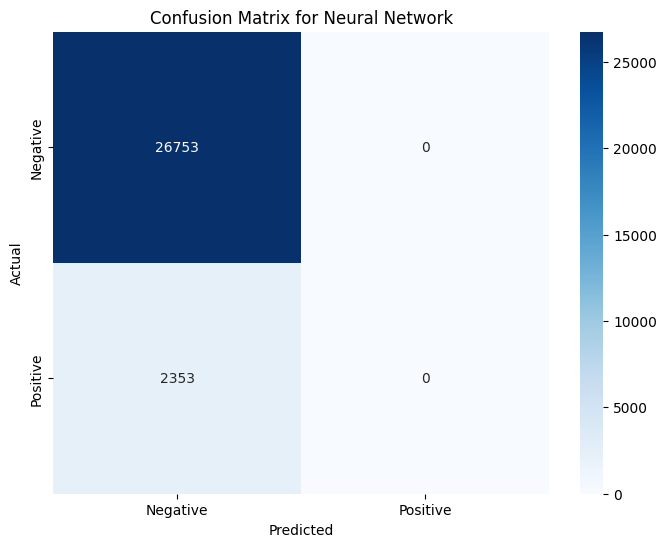

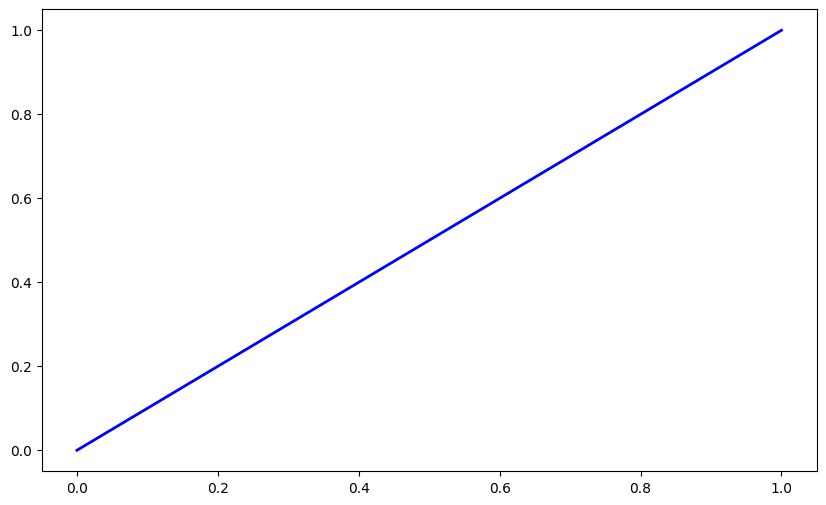

In [ ]:
# import tensorflow as tf
# # import tensorflow_addons as tfa # Import tensorflow_addons
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout

# # ... (other imports and code)

# # Neural network model class with 3 layers and dropout
# class NeuralNetworkClassifier:
#     def __init__(self, input_dim, y_train):
#         self.class_weight = self.calculate_class_weights(y_train)
#         self.model = self.build_model(input_dim)

#     def calculate_class_weights(self, y_train):
#         # Convert y_train to NumPy array to ensure correct indexing
#         y_train_np = y_train.to_numpy()
#         return {0: len(y_train_np) / (2 * len(y_train_np[y_train_np == 0])),
#                 1: len(y_train_np) / (2 * len(y_train_np[y_train_np == 1]))}

#     def build_model(self, input_dim):
#         model = Sequential()
#         model.add(Dense(128, input_dim=input_dim, activation='relu'))
#         model.add(Dropout(0.2))  # Add dropout after the first dense layer
#         model.add(Dense(64, activation='relu'))
#         model.add(Dropout(0.2))  # Add dropout after the second dense layer
#         model.add(Dense(1, activation='sigmoid'))
#         model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#         return model


#     def train_and_evaluate(self, X_train, X_test, y_train, y_test, epochs=50, batch_size=32):
#         print("Training and evaluating Neural Network...")

#         # Convert y_train and y_test to NumPy arrays for compatibility with Keras
#         y_train_np = y_train.to_numpy()
#         y_test_np = y_test.to_numpy()

#         # Custom metric function (combining recall, F1-score, and validation accuracy)
#         def custom_metric(y_true, y_pred):
#             recall = tf.keras.metrics.Recall()(y_true, tf.round(y_pred)).numpy()
#             # f1 = tf.keras.metrics.F1Score(num_classes=1, threshold=0.5)(y_true, tf.round(y_pred)).numpy()[0]
#             val_acc = tf.keras.metrics.Accuracy()(y_true, tf.round(y_pred)).numpy()
#             # Weighted average of the metrics (adjust weights as needed)
#             return 0.7 * recall + 0.3 * val_acc

#         # ModelCheckpoint callback with the custom metric
#         model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
#             filepath='best_model_weights.weights.h5',
#             save_weights_only=True,
#             monitor='val_custom_metric',  # Monitor the custom metric
#             mode='max',  # Maximize the metric
#             save_best_only=True)

#         # Add custom metric to the model compilation
#         self.model.compile(optimizer='adam', loss='binary_crossentropy',
#                            metrics=['accuracy'])# tf.metrics.F1Score(threshold=0.5)

#         # Train the model with the custom metric and callback
#         history = self.model.fit(X_train, y_train_np, epochs=epochs, batch_size=batch_size,
#                                   validation_data=(X_test, y_test_np), verbose=1,
#                                   class_weight=self.class_weight,
#                                   callbacks=[model_checkpoint_callback])

#         # Evaluate the model
#         loss, accuracy = self.model.evaluate(X_test, y_test_np, verbose=0)
#         print(f"Neural Network - Accuracy: {accuracy}\n")

#         # Predict probabilities and calculate ROC-AUC score
#         y_pred_proba = self.model.predict(X_test)
#         roc_auc = roc_auc_score(y_test_np, y_pred_proba)
#         print(f"Neural Network - ROC-AUC Score: {roc_auc}\n")

#         # Confusion Matrix
#         y_pred = (y_pred_proba > 0.5).astype(int)
#         cm = confusion_matrix(y_test_np, y_pred)
#         plt.figure(figsize=(8, 6))
#         sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
#         plt.xlabel('Predicted')
#         plt.ylabel('Actual')
#         plt.title('Confusion Matrix for Neural Network')
#         plt.show()

#         # ROC Curve
#         from sklearn.metrics import roc_curve, auc
#         fpr, tpr, _ = roc_curve(y_test_np, y_pred_proba)
#         roc_auc = auc(fpr, tpr)
#         plt.figure(figsize=(10, 6))
#         plt.plot(fpr, tpr, color='blue', lw=2)
# input_dim = X_train.shape[1]
# neural_network_classifier = NeuralNetworkClassifier(input_dim, y_train)
# neural_network_classifier.train_and_evaluate(X_train, X_test, y_train, y_test)

In [ ]:
# class CustomMetric(tf.keras.metrics.Metric):
#     def __init__(self, name='custom_metric', **kwargs):
#         super(CustomMetric, self).__init__(name=name, **kwargs)
#         self.recall = tf.keras.metrics.Recall()
#         self.accuracy = tf.keras.metrics.Accuracy()

#     def update_state(self, y_true, y_pred, sample_weight=None):
#         self.recall.update_state(y_true, tf.round(y_pred), sample_weight)
#         self.accuracy.update_state(y_true, tf.round(y_pred), sample_weight)

#     def result(self):
#         recall_result = self.recall.result().numpy()
#         accuracy_result = self.accuracy.result().numpy()
#         # Weighted average (adjust weights as needed)
#         return 0.7 * recall_result + 0.3 * accuracy_result

#     def reset_state(self):
#         self.recall.reset_state()
#         self.accuracy.reset_state()

# # Neural network model class with 3 layers and dropout
# class NeuralNetworkClassifier:
#     def __init__(self, input_dim, y_train):
#         self.class_weight = self.calculate_class_weights(y_train)
#         self.model = self.build_model(input_dim)

#     def calculate_class_weights(self, y_train):
#         # Convert y_train to NumPy array to ensure correct indexing
#         y_train_np = y_train.to_numpy()
#         return {0: len(y_train_np) / (2 * len(y_train_np[y_train_np == 0])),
#                 1: len(y_train_np) / (2 * len(y_train_np[y_train_np == 1]))}

#     def build_model(self, input_dim):
#         model = Sequential()
#         model.add(Dense(128, input_dim=input_dim, activation='relu'))
#         model.add(Dropout(0.2))  # Add dropout after the first dense layer
#         model.add(Dense(64, activation='relu'))
#         model.add(Dropout(0.2))  # Add dropout after the second dense layer
#         model.add(Dense(32, activation='relu'))
#         model.add(Dropout(0.2))  # Add dropout after the second dense layer
#         model.add(Dense(16, activation='relu'))
#         model.add(Dropout(0.2))  # Add dropout after the second dense layer
#         model.add(Dense(1, activation='sigmoid'))
#         model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#         return model

#     def train_and_evaluate(self, X_train, X_test, y_train, y_test, epochs=50, batch_size=32):
#         print("Training and evaluating Neural Network...")

#         # Convert y_train and y_test to NumPy arrays for compatibility with Keras
#         y_train_np = y_train.to_numpy()
#         y_test_np = y_test.to_numpy()

#         model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
#             filepath='best_model_weights.h5',
#             save_weights_only=True,
#             monitor='val_custom_metric',  # Monitor the custom metric
#             mode='max',
#             save_best_only=True)

#         # Add custom metric to the model compilation
#         custom_metric = CustomMetric()  # Create an instance of the custom metric
#         self.model.compile(optimizer='adam', loss='binary_crossentropy',
#                            metrics=['accuracy', custom_metric])  # Add custom metric

#         # Train the model with the custom metric and callback
#         history = self.model.fit(X_train, y_train_np, epochs=epochs, batch_size=batch_size,
#                                   validation_data=(X_test, y_test_np), verbose=1,
#                                   class_weight=self.class_weight,
#                                   callbacks=[model_checkpoint_callback])
#         # Evaluate the model
#         loss, accuracy = self.model.evaluate(X_test, y_test_np, verbose=0)
#         print(f"Neural Network - Accuracy: {accuracy}\n")

#         # Predict probabilities and calculate ROC-AUC score
#         y_pred_proba = self.model.predict(X_test)
#         roc_auc = roc_auc_score(y_test_np, y_pred_proba)
#         print(f"Neural Network - ROC-AUC Score: {roc_auc}\n")

#         # Confusion Matrix
#         y_pred = (y_pred_proba > 0.5).astype(int)
#         cm = confusion_matrix(y_test_np, y_pred)
#         plt.figure(figsize=(8, 6))
#         sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
#         plt.xlabel('Predicted')
#         plt.ylabel('Actual')
#         plt.title('Confusion Matrix for Neural Network')
#         plt.show()

#         # ROC Curve
#         from sklearn.metrics import roc_curve, auc
#         fpr, tpr, _ = roc_curve(y_test_np, y_pred_proba)
#         roc_auc = auc(fpr, tpr)
#         plt.figure(figsize=(10, 6))
#         plt.plot(fpr, tpr, color='blue', lw=2)
# input_dim = X_train.shape[1]
# neural_network_classifier = NeuralNetworkClassifier(input_dim, y_train)
# neural_network_classifier.train_and_evaluate(X_train, X_test, y_train, y_test)

In [ ]:
class CustomMetric(tf.keras.metrics.Metric):
    def __init__(self, name='custom_metric', **kwargs):
        super(CustomMetric, self).__init__(name=name, **kwargs)
        self.recall = tf.keras.metrics.Recall()
        self.accuracy = tf.keras.metrics.Accuracy()
        self.precision = tf.keras.metrics.Precision()

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_pred_rounded = tf.round(y_pred)
        self.recall.update_state(y_true, y_pred_rounded, sample_weight)
        self.accuracy.update_state(y_true, y_pred_rounded, sample_weight)
        self.precision.update_state(y_true, y_pred_rounded, sample_weight)

    def result(self):
        recall_result = self.recall.result()
        precision_result = self.precision.result()
        accuracy_result = self.accuracy.result()
        # Weighted average (adjust weights as needed)
        return 0.6 * recall_result + 0.1 * accuracy_result + 0.3 * precision_result

    def reset_state(self):
        self.recall.reset_state()
        self.accuracy.reset_state()
        self.precision.reset_state()


class NeuralNetworkClassifier:
    def __init__(self, input_dim, y_train):
        # Ensure y_train is a NumPy array
        if isinstance(y_train, pd.Series):
            y_train_np = y_train.to_numpy()
        else:
            y_train_np = np.array(y_train)

        self.class_weight = self.calculate_class_weights(y_train_np)
        self.model = self.build_model(input_dim)

    def calculate_class_weights(self, y_train_np):
        # Compute class weights using sklearn's utility
        classes = np.unique(y_train_np)
        cw = class_weight.compute_class_weight('balanced', classes=classes, y=y_train_np)
        class_w_dict = {i: w for i, w in zip(classes, cw)}
        return class_w_dict

    def build_model(self, input_dim):
        model = Sequential([
            Dense(128, input_dim=input_dim, activation='relu'),
            Dropout(0.4),
            Dense(256, activation='relu'),
            Dropout(0.4),
            Dense(128, activation='relu'),
            Dropout(0.4),
            Dense(32, activation='relu'),
            # Dropout(0.0),
            Dense(16, activation='relu'),
            # Dropout(0.2),
            Dense(1, activation='sigmoid')
        ])
        return model

    def train_and_evaluate(self, X_train, X_test, y_train, y_test, epochs=50, batch_size=32):
        print("Training and evaluating Neural Network...")

        # Convert y_train and y_test to NumPy arrays for compatibility with Keras
        if isinstance(y_train, pd.Series):
            y_train_np = y_train.to_numpy()
        else:
            y_train_np = np.array(y_train)

        if isinstance(y_test, pd.Series):
            y_test_np = y_test.to_numpy()
        else:
            y_test_np = np.array(y_test)

        # Add custom metric to the model compilation
        focal_loss = tf.keras.losses.BinaryFocalCrossentropy(alpha=0.15, gamma=2.0)

        # model.compile(optimizer='adam', loss=focal_loss, metrics=['accuracy', CustomMetric()])
        custom_metric = CustomMetric()
        self.model.compile(
            optimizer='adam',
            loss = focal_loss,
            metrics=[custom_metric]
        )#'binary_crossentropy',

        # Model checkpoint callback
        model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
            filepath='best_model_weights.weights.h5',
            save_weights_only=True,
            monitor='val_custom_metric',  # Monitor the custom metric
            mode='max',
            save_best_only=True
        )

        # Train the model
        history = self.model.fit(
            X_train, y_train_np,
            epochs=epochs,
            batch_size=batch_size,
            validation_data=(X_test, y_test_np),
            verbose=1,
            class_weight=self.class_weight,
            callbacks=[model_checkpoint_callback]
        )

        # Evaluate the model on test set
        eval_results = self.model.evaluate(X_test, y_test_np, verbose=0)
        # eval_results should be [loss, accuracy, custom_metric_value]
        loss, custom_metric_value = eval_results
        print(f"Neural Network - Test Loss: {loss:.4f},  Custom Metric: {custom_metric_value:.4f}")

        # Predict probabilities
        y_pred_proba = self.model.predict(X_test)
        # Calculate ROC-AUC score
        roc_auc = roc_auc_score(y_test_np, y_pred_proba)
        print(f"Neural Network - ROC-AUC Score: {roc_auc:.4f}")

        # Confusion Matrix
        y_pred = (y_pred_proba > 0.5).astype(int)
        cm = confusion_matrix(y_test_np, y_pred)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title('Confusion Matrix for Neural Network')
        plt.show()

        # ROC Curve
        fpr, tpr, _ = roc_curve(y_test_np, y_pred_proba)
        plt.figure(figsize=(10, 6))
        plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve for Neural Network')
        plt.legend(loc="lower right")
        plt.show()

        # Plot Loss vs Epoch
        plt.figure(figsize=(8, 6))
        plt.plot(history.history['loss'], label='Training Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.title('Loss vs Epoch')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()

        y_value_pred_train_proba = self.model.predict(X_train)
        return y_pred_proba, y_value_pred_train_proba


In [ ]:
fill_rate = X.notnull().mean()
fill_rate

,0
vin_num_loans_approved_last_3_months_mean,0.065819
vin_num_loans_approved_last_3_months_sum,1.000000
vin_num_loans_approved_last_3_months_min,0.065819
vin_num_loans_approved_last_3_months_max,0.065819
num_previous_applications_last_3_months_mean,0.155097
...,...
vin_total_loan_amount_revolving loans_std_max,0.113132
vin_total_loan_amount_xna_std_mean,0.000089
vin_total_loan_amount_xna_std_sum,1.000000
vin_total_loan_amount_xna_std_min,0.000089


In [ ]:
columns_to_keep = fill_rate[fill_rate >= 0.7].index

In [ ]:
len(columns_to_keep)

79

In [ ]:
columns_to_keep_60 = fill_rate[fill_rate >= 0.5].index
len(columns_to_keep_60)

100

In [ ]:
X_train = X[columns_to_keep]
X_train

,vin_num_loans_approved_last_3_months_sum,num_previous_applications_last_3_months_sum,vin_avg_rejections_last_3_months_sum,vin_num_loans_approved_last_6_months_sum,num_previous_applications_last_6_months_sum,vin_avg_rejections_last_6_months_sum,vin_num_loans_approved_last_12_months_sum,num_previous_applications_last_12_months_sum,vin_avg_rejections_last_12_months_sum,vin_num_loans_approved_last_24_months_mean,...,vin_total_loan_amount_consumer loans_min_mean,vin_total_loan_amount_consumer loans_min_sum,vin_total_loan_amount_consumer loans_min_min,vin_total_loan_amount_consumer loans_min_max,vin_total_loan_amount_revolving loans_min_sum,vin_total_loan_amount_xna_min_sum,vin_total_loan_amount_cash loans_std_sum,vin_total_loan_amount_consumer loans_std_sum,vin_total_loan_amount_revolving loans_std_sum,vin_total_loan_amount_xna_std_sum
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,179055.0,179055.0,179055.0,179055.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,68053.5,204160.5,68053.5,68053.5,0.0,0.0,0.000000e+00,5.952085e+05,0.000000e+00,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,20106.0,20106.0,20106.0,20106.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,27.0,63.0,9.0,5.0,...,24219.0,217971.0,24219.0,24219.0,0.0,0.0,3.650631e+06,1.550967e+06,1.718269e+06,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,14616.0,87696.0,14616.0,14616.0,0.0,0.0,2.964215e+05,6.808166e+04,0.000000e+00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291052,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,...,40455.0,40455.0,40455.0,40455.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0
291053,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,56821.5,56821.5,56821.5,56821.5,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0
291054,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,13945.5,27891.0,13945.5,13945.5,0.0,0.0,0.000000e+00,1.889460e+04,0.000000e+00,0.0
291055,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,2.0,...,21456.0,42912.0,21456.0,21456.0,0.0,0.0,0.000000e+00,3.195663e+05,0.000000e+00,0.0


In [ ]:
# X_train.fillna(-(10e10-1), inplace=True)

In [ ]:
X_train

,vin_num_loans_approved_last_3_months_sum,num_previous_applications_last_3_months_sum,vin_avg_rejections_last_3_months_sum,vin_num_loans_approved_last_6_months_sum,num_previous_applications_last_6_months_sum,vin_avg_rejections_last_6_months_sum,vin_num_loans_approved_last_12_months_sum,num_previous_applications_last_12_months_sum,vin_avg_rejections_last_12_months_sum,vin_num_loans_approved_last_24_months_mean,...,vin_total_loan_amount_consumer loans_min_mean,vin_total_loan_amount_consumer loans_min_sum,vin_total_loan_amount_consumer loans_min_min,vin_total_loan_amount_consumer loans_min_max,vin_total_loan_amount_revolving loans_min_sum,vin_total_loan_amount_xna_min_sum,vin_total_loan_amount_cash loans_std_sum,vin_total_loan_amount_consumer loans_std_sum,vin_total_loan_amount_revolving loans_std_sum,vin_total_loan_amount_xna_std_sum
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,179055.0,179055.0,179055.0,179055.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,68053.5,204160.5,68053.5,68053.5,0.0,0.0,0.000000e+00,5.952085e+05,0.000000e+00,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,20106.0,20106.0,20106.0,20106.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,27.0,63.0,9.0,5.0,...,24219.0,217971.0,24219.0,24219.0,0.0,0.0,3.650631e+06,1.550967e+06,1.718269e+06,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,14616.0,87696.0,14616.0,14616.0,0.0,0.0,2.964215e+05,6.808166e+04,0.000000e+00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291052,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,...,40455.0,40455.0,40455.0,40455.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0
291053,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,56821.5,56821.5,56821.5,56821.5,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0
291054,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,13945.5,27891.0,13945.5,13945.5,0.0,0.0,0.000000e+00,1.889460e+04,0.000000e+00,0.0
291055,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,2.0,...,21456.0,42912.0,21456.0,21456.0,0.0,0.0,0.000000e+00,3.195663e+05,0.000000e+00,0.0


In [ ]:
cov_matrix = X_train.cov()

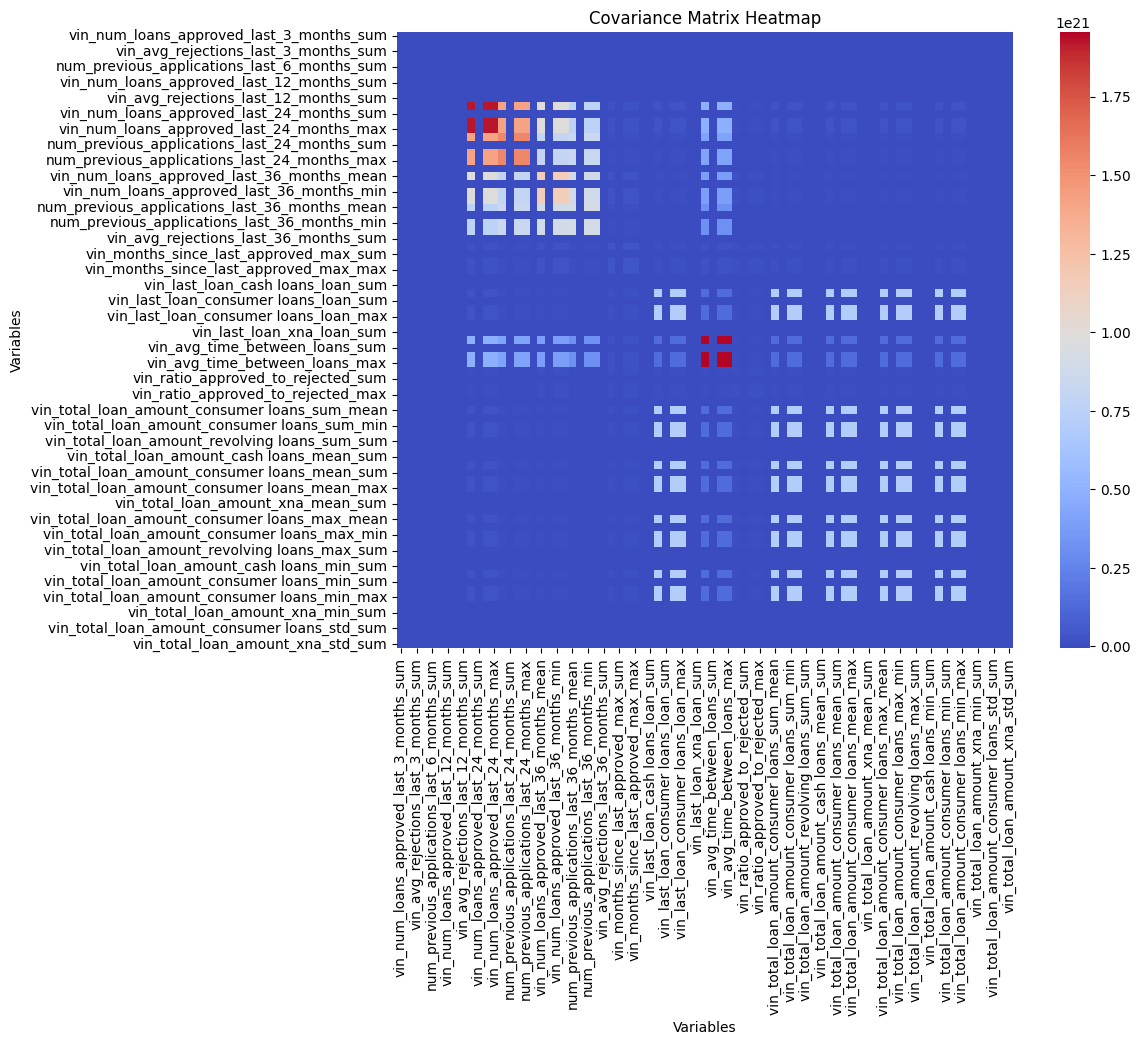

In [ ]:
# Plot the covariance matrix
plt.figure(figsize=(12, 8))
sns.heatmap(cov_matrix, annot=False, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Covariance Matrix Heatmap")
plt.xlabel("Variables")
plt.ylabel("Variables")
plt.show()

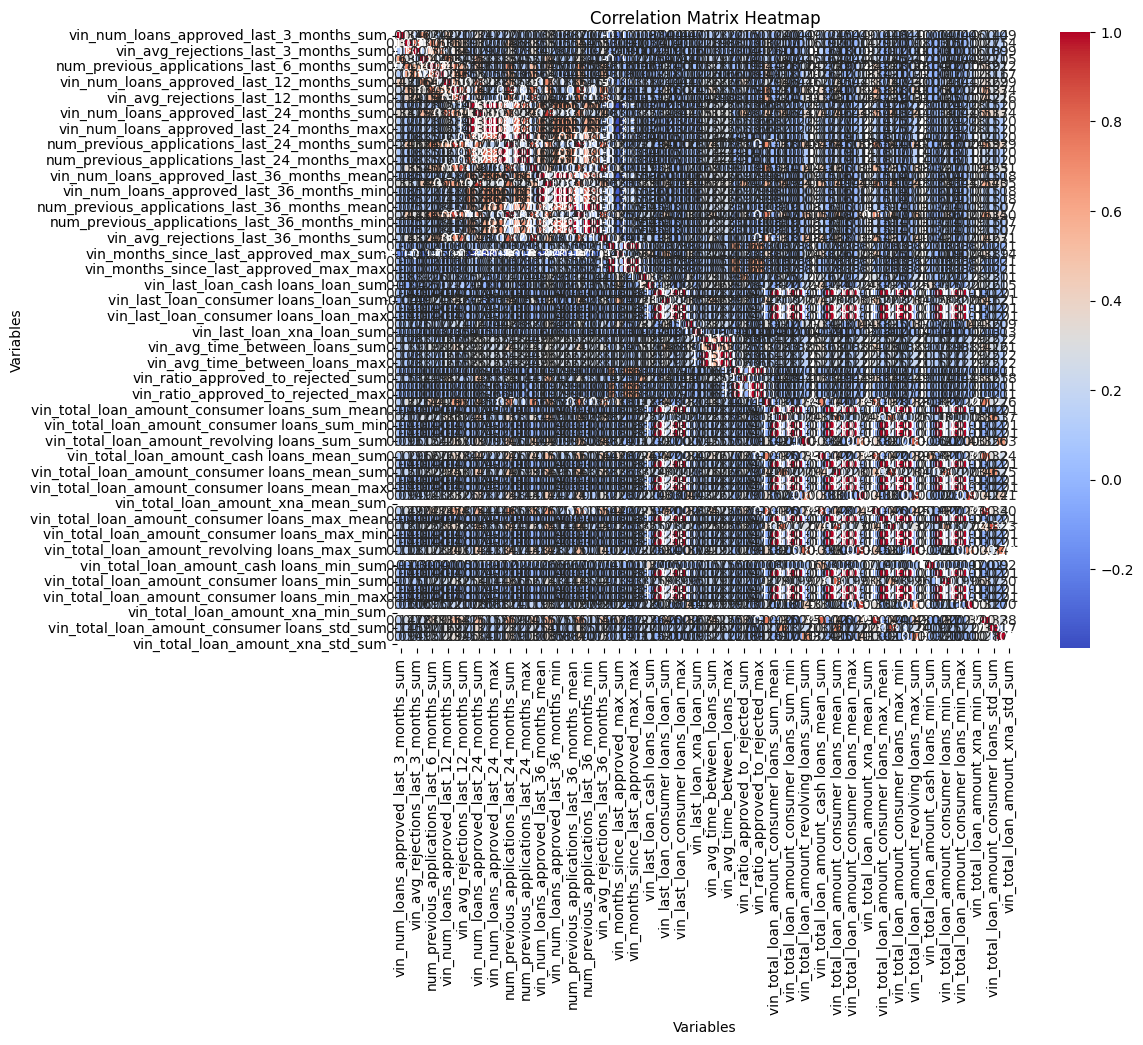

In [ ]:
correlation_matrix = X_train.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix Heatmap")
plt.xlabel("Variables")
plt.ylabel("Variables")
plt.show()

In [ ]:
X_train.describe()

,vin_num_loans_approved_last_3_months_sum,num_previous_applications_last_3_months_sum,vin_avg_rejections_last_3_months_sum,vin_num_loans_approved_last_6_months_sum,num_previous_applications_last_6_months_sum,vin_avg_rejections_last_6_months_sum,vin_num_loans_approved_last_12_months_sum,num_previous_applications_last_12_months_sum,vin_avg_rejections_last_12_months_sum,vin_num_loans_approved_last_24_months_mean,...,vin_total_loan_amount_consumer loans_min_mean,vin_total_loan_amount_consumer loans_min_sum,vin_total_loan_amount_consumer loans_min_min,vin_total_loan_amount_consumer loans_min_max,vin_total_loan_amount_revolving loans_min_sum,vin_total_loan_amount_xna_min_sum,vin_total_loan_amount_cash loans_std_sum,vin_total_loan_amount_consumer loans_std_sum,vin_total_loan_amount_revolving loans_std_sum,vin_total_loan_amount_xna_std_sum
count,291057.000000,291057.000000,291057.000000,291057.000000,291057.000000,291057.000000,291057.000000,291057.000000,291057.000000,215486.000000,...,2.690230e+05,2.910570e+05,2.690230e+05,2.690230e+05,2.910570e+05,291057.0,2.910570e+05,2.910570e+05,2.910570e+05,291057.0
mean,0.464194,2.346441,0.474426,1.244172,6.100475,1.464799,3.725710,15.841055,4.153070,1.740150,...,7.126791e+04,2.671001e+05,7.126791e+04,7.126791e+04,3.836864e+05,0.0,9.844611e+05,1.628553e+05,1.496455e+05,0.0
std,2.338655,14.666470,7.049018,4.136591,26.945550,11.587174,7.962032,51.568361,23.501414,0.994366,...,8.057864e+04,4.124715e+05,8.057864e+04,8.057864e+04,1.159145e+06,0.0,2.099738e+06,4.050778e+05,7.047781e+05,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,2.664900e+04,7.788150e+04,2.664900e+04,2.664900e+04,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,...,4.639500e+04,1.566225e+05,4.639500e+04,4.639500e+04,0.000000e+00,0.0,0.000000e+00,1.638347e+04,0.000000e+00,0.0
75%,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,5.000000,12.000000,0.000000,2.000000,...,8.804250e+04,3.080880e+05,8.804250e+04,8.804250e+04,9.000000e+04,0.0,1.074555e+06,1.878312e+05,0.000000e+00,0.0
max,126.000000,1575.000000,962.000000,204.000000,2816.000000,962.000000,275.000000,4248.000000,2950.000000,15.000000,...,4.095000e+06,3.404977e+07,4.095000e+06,4.095000e+06,3.780000e+07,0.0,6.436083e+07,5.061866e+07,3.274258e+07,0.0


In [ ]:
X_train_copy = X_train.copy()

In [ ]:
X_train_copy

,vin_num_loans_approved_last_3_months_sum,num_previous_applications_last_3_months_sum,vin_avg_rejections_last_3_months_sum,vin_num_loans_approved_last_6_months_sum,num_previous_applications_last_6_months_sum,vin_avg_rejections_last_6_months_sum,vin_num_loans_approved_last_12_months_sum,num_previous_applications_last_12_months_sum,vin_avg_rejections_last_12_months_sum,vin_num_loans_approved_last_24_months_mean,...,vin_total_loan_amount_consumer loans_min_mean,vin_total_loan_amount_consumer loans_min_sum,vin_total_loan_amount_consumer loans_min_min,vin_total_loan_amount_consumer loans_min_max,vin_total_loan_amount_revolving loans_min_sum,vin_total_loan_amount_xna_min_sum,vin_total_loan_amount_cash loans_std_sum,vin_total_loan_amount_consumer loans_std_sum,vin_total_loan_amount_revolving loans_std_sum,vin_total_loan_amount_xna_std_sum
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,179055.0,179055.0,179055.0,179055.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,68053.5,204160.5,68053.5,68053.5,0.0,0.0,0.000000e+00,5.952085e+05,0.000000e+00,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,20106.0,20106.0,20106.0,20106.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,27.0,63.0,9.0,5.0,...,24219.0,217971.0,24219.0,24219.0,0.0,0.0,3.650631e+06,1.550967e+06,1.718269e+06,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,14616.0,87696.0,14616.0,14616.0,0.0,0.0,2.964215e+05,6.808166e+04,0.000000e+00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291052,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,...,40455.0,40455.0,40455.0,40455.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0
291053,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,56821.5,56821.5,56821.5,56821.5,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0
291054,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,13945.5,27891.0,13945.5,13945.5,0.0,0.0,0.000000e+00,1.889460e+04,0.000000e+00,0.0
291055,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,2.0,...,21456.0,42912.0,21456.0,21456.0,0.0,0.0,0.000000e+00,3.195663e+05,0.000000e+00,0.0


In [ ]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_train

array([[-0.19848803, -0.15998702, -0.06730395, ..., -0.40203544,
        -0.21233026,  0.        ],
       [-0.19848803, -0.15998702, -0.06730395, ...,  1.06733567,
        -0.21233026,  0.        ],
       [-0.19848803, -0.15998702, -0.06730395, ..., -0.40203544,
        -0.21233026,  0.        ],
       ...,
       [-0.19848803, -0.15998702, -0.06730395, ..., -0.35539098,
        -0.21233026,  0.        ],
       [-0.19848803, -0.15998702, -0.06730395, ...,  0.38686703,
        -0.21233026,  0.        ],
       [-0.19848803, -0.15998702, -0.06730395, ...,  0.14085754,
        -0.21233026,  0.        ]])

In [ ]:
X_train_scaled_df = pd.DataFrame(X_train, columns=X_train_copy.columns)
X_train_scaled_df

,vin_num_loans_approved_last_3_months_sum,num_previous_applications_last_3_months_sum,vin_avg_rejections_last_3_months_sum,vin_num_loans_approved_last_6_months_sum,num_previous_applications_last_6_months_sum,vin_avg_rejections_last_6_months_sum,vin_num_loans_approved_last_12_months_sum,num_previous_applications_last_12_months_sum,vin_avg_rejections_last_12_months_sum,vin_num_loans_approved_last_24_months_mean,...,vin_total_loan_amount_consumer loans_min_mean,vin_total_loan_amount_consumer loans_min_sum,vin_total_loan_amount_consumer loans_min_min,vin_total_loan_amount_consumer loans_min_max,vin_total_loan_amount_revolving loans_min_sum,vin_total_loan_amount_xna_min_sum,vin_total_loan_amount_cash loans_std_sum,vin_total_loan_amount_consumer loans_std_sum,vin_total_loan_amount_revolving loans_std_sum,vin_total_loan_amount_xna_std_sum
0,-0.198488,-0.159987,-0.067304,-0.300773,-0.226400,-0.126416,-0.467935,-0.307186,-0.176716,-7.443452e-01,...,1.337666,-0.213458,1.337666,1.337666,-0.331009,0.0,-0.468850,-0.402035,-0.212330,0.0
1,-0.198488,-0.159987,-0.067304,-0.300773,-0.226400,-0.126416,-0.467935,-0.307186,-0.176716,-1.000000e+11,...,-0.039892,-0.152592,-0.039892,-0.039892,-0.331009,0.0,-0.468850,1.067336,-0.212330,0.0
2,-0.198488,-0.159987,-0.067304,-0.300773,-0.226400,-0.126416,-0.467935,-0.307186,-0.176716,-1.000000e+11,...,-0.634933,-0.598816,-0.634933,-0.634933,-0.331009,0.0,-0.468850,-0.402035,-0.212330,0.0
3,-0.198488,-0.159987,-0.067304,-0.300773,-0.226400,-0.126416,2.923165,0.914495,0.206240,3.278326e+00,...,-0.583889,-0.119109,-0.583889,-0.583889,-0.331009,0.0,1.269766,3.426785,2.225703,0.0
4,-0.198488,-0.159987,-0.067304,-0.300773,-0.226400,-0.126416,-0.467935,-0.307186,-0.176716,-7.443452e-01,...,-0.703065,-0.434950,-0.703065,-0.703065,-0.331009,0.0,-0.327679,-0.233965,-0.212330,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291052,-0.198488,-0.159987,-0.067304,-0.300773,-0.226400,-0.126416,-0.342339,-0.287794,-0.176716,-7.443452e-01,...,-0.382396,-0.549481,-0.382396,-0.382396,-0.331009,0.0,-0.468850,-0.402035,-0.212330,0.0
291053,-0.198488,-0.159987,-0.067304,-0.300773,-0.226400,-0.126416,-0.467935,-0.307186,-0.176716,-1.000000e+11,...,-0.179284,-0.509802,-0.179284,-0.179284,-0.331009,0.0,-0.468850,-0.402035,-0.212330,0.0
291054,-0.198488,-0.159987,-0.067304,-0.300773,-0.226400,-0.126416,-0.467935,-0.307186,-0.176716,-1.000000e+11,...,-0.711386,-0.579942,-0.711386,-0.711386,-0.331009,0.0,-0.468850,-0.355391,-0.212330,0.0
291055,-0.198488,-0.159987,-0.067304,-0.300773,-0.226400,-0.126416,0.034450,-0.229619,-0.176716,2.613226e-01,...,-0.618179,-0.543525,-0.618179,-0.618179,-0.331009,0.0,-0.468850,0.386867,-0.212330,0.0


In [ ]:
X_train_scaled_df.describe()

,vin_num_loans_approved_last_3_months_sum,num_previous_applications_last_3_months_sum,vin_avg_rejections_last_3_months_sum,vin_num_loans_approved_last_6_months_sum,num_previous_applications_last_6_months_sum,vin_avg_rejections_last_6_months_sum,vin_num_loans_approved_last_12_months_sum,num_previous_applications_last_12_months_sum,vin_avg_rejections_last_12_months_sum,vin_num_loans_approved_last_24_months_mean,...,vin_total_loan_amount_consumer loans_min_mean,vin_total_loan_amount_consumer loans_min_sum,vin_total_loan_amount_consumer loans_min_min,vin_total_loan_amount_consumer loans_min_max,vin_total_loan_amount_revolving loans_min_sum,vin_total_loan_amount_xna_min_sum,vin_total_loan_amount_cash loans_std_sum,vin_total_loan_amount_consumer loans_std_sum,vin_total_loan_amount_revolving loans_std_sum,vin_total_loan_amount_xna_std_sum
count,2.910570e+05,2.910570e+05,2.910570e+05,2.910570e+05,2.910570e+05,2.910570e+05,2.910570e+05,2.910570e+05,2.910570e+05,2.910570e+05,...,2.910570e+05,2.910570e+05,2.910570e+05,2.910570e+05,2.910570e+05,291057.0,2.910570e+05,2.910570e+05,2.910570e+05,291057.0
mean,1.540428e-17,1.674697e-17,1.501368e-17,2.734199e-18,-1.511133e-17,6.591373e-18,-4.687199e-18,-5.309718e-18,9.764998e-18,-2.596433e+10,...,-7.570338e+09,-7.289571e-17,-7.570338e+09,-7.570338e+09,1.904175e-17,0.0,-2.090930e-17,6.870897e-17,-4.382653e-17,0.0
std,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,4.384396e+10,...,2.645234e+10,1.000002e+00,2.645234e+10,2.645234e+10,1.000002e+00,0.0,1.000002e+00,1.000002e+00,1.000002e+00,0.0
min,-1.984880e-01,-1.599870e-01,-6.730395e-02,-3.007728e-01,-2.264005e-01,-1.264158e-01,-4.679354e-01,-3.071861e-01,-1.767160e-01,-1.000000e+11,...,-1.000000e+11,-6.475612e-01,-1.000000e+11,-1.000000e+11,-3.310088e-01,0.0,-4.688504e-01,-4.020354e-01,-2.123303e-01,0.0
25%,-1.984880e-01,-1.599870e-01,-6.730395e-02,-3.007728e-01,-2.264005e-01,-1.264158e-01,-4.679354e-01,-3.071861e-01,-1.767160e-01,-1.000000e+11,...,-5.952260e-01,-4.587441e-01,-5.952260e-01,-5.952260e-01,-3.310088e-01,0.0,-4.688504e-01,-4.020354e-01,-2.123303e-01,0.0
50%,-1.984880e-01,-1.599870e-01,-6.730395e-02,-3.007728e-01,-2.264005e-01,-1.264158e-01,-4.679354e-01,-2.684025e-01,-1.767160e-01,-7.443452e-01,...,-3.616774e-01,-2.678434e-01,-3.616774e-01,-3.616774e-01,-3.310088e-01,0.0,-4.688504e-01,-3.615901e-01,-2.123303e-01,0.0
75%,-1.984880e-01,-1.599870e-01,-6.730395e-02,-3.007728e-01,-1.150647e-01,-1.264158e-01,1.600461e-01,-7.448485e-02,-1.767160e-01,2.613226e-01,...,1.461319e-01,9.937174e-02,1.461319e-01,1.461319e-01,-2.533652e-01,0.0,4.290721e-02,6.165698e-02,-2.123303e-01,0.0
max,5.367872e+01,1.072280e+02,1.364058e+02,4.901528e+01,1.042808e+02,8.289656e+01,3.407105e+01,8.206905e+01,1.253479e+02,1.333500e+01,...,4.993556e+01,8.190318e+01,4.993556e+01,4.993556e+01,3.227930e+01,0.0,3.018305e+01,1.245585e+02,4.624575e+01,0.0


In [ ]:
X_train_scaled_df.fillna(-(10e10-1), inplace=True)

In [ ]:
X_train_scaled_df

,vin_num_loans_approved_last_3_months_sum,num_previous_applications_last_3_months_sum,vin_avg_rejections_last_3_months_sum,vin_num_loans_approved_last_6_months_sum,num_previous_applications_last_6_months_sum,vin_avg_rejections_last_6_months_sum,vin_num_loans_approved_last_12_months_sum,num_previous_applications_last_12_months_sum,vin_avg_rejections_last_12_months_sum,vin_num_loans_approved_last_24_months_mean,...,vin_total_loan_amount_consumer loans_min_mean,vin_total_loan_amount_consumer loans_min_sum,vin_total_loan_amount_consumer loans_min_min,vin_total_loan_amount_consumer loans_min_max,vin_total_loan_amount_revolving loans_min_sum,vin_total_loan_amount_xna_min_sum,vin_total_loan_amount_cash loans_std_sum,vin_total_loan_amount_consumer loans_std_sum,vin_total_loan_amount_revolving loans_std_sum,vin_total_loan_amount_xna_std_sum
0,-0.198488,-0.159987,-0.067304,-0.300773,-0.226400,-0.126416,-0.467935,-0.307186,-0.176716,-7.443452e-01,...,1.337666,-0.213458,1.337666,1.337666,-0.331009,0.0,-0.468850,-0.402035,-0.212330,0.0
1,-0.198488,-0.159987,-0.067304,-0.300773,-0.226400,-0.126416,-0.467935,-0.307186,-0.176716,-1.000000e+11,...,-0.039892,-0.152592,-0.039892,-0.039892,-0.331009,0.0,-0.468850,1.067336,-0.212330,0.0
2,-0.198488,-0.159987,-0.067304,-0.300773,-0.226400,-0.126416,-0.467935,-0.307186,-0.176716,-1.000000e+11,...,-0.634933,-0.598816,-0.634933,-0.634933,-0.331009,0.0,-0.468850,-0.402035,-0.212330,0.0
3,-0.198488,-0.159987,-0.067304,-0.300773,-0.226400,-0.126416,2.923165,0.914495,0.206240,3.278326e+00,...,-0.583889,-0.119109,-0.583889,-0.583889,-0.331009,0.0,1.269766,3.426785,2.225703,0.0
4,-0.198488,-0.159987,-0.067304,-0.300773,-0.226400,-0.126416,-0.467935,-0.307186,-0.176716,-7.443452e-01,...,-0.703065,-0.434950,-0.703065,-0.703065,-0.331009,0.0,-0.327679,-0.233965,-0.212330,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291052,-0.198488,-0.159987,-0.067304,-0.300773,-0.226400,-0.126416,-0.342339,-0.287794,-0.176716,-7.443452e-01,...,-0.382396,-0.549481,-0.382396,-0.382396,-0.331009,0.0,-0.468850,-0.402035,-0.212330,0.0
291053,-0.198488,-0.159987,-0.067304,-0.300773,-0.226400,-0.126416,-0.467935,-0.307186,-0.176716,-1.000000e+11,...,-0.179284,-0.509802,-0.179284,-0.179284,-0.331009,0.0,-0.468850,-0.402035,-0.212330,0.0
291054,-0.198488,-0.159987,-0.067304,-0.300773,-0.226400,-0.126416,-0.467935,-0.307186,-0.176716,-1.000000e+11,...,-0.711386,-0.579942,-0.711386,-0.711386,-0.331009,0.0,-0.468850,-0.355391,-0.212330,0.0
291055,-0.198488,-0.159987,-0.067304,-0.300773,-0.226400,-0.126416,0.034450,-0.229619,-0.176716,2.613226e-01,...,-0.618179,-0.543525,-0.618179,-0.618179,-0.331009,0.0,-0.468850,0.386867,-0.212330,0.0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_train_scaled_df, y, test_size=0.1, random_state=42)
# model_classifier = ModelClassifier(y_train)
# model_classifier.train_and_evaluate(X_train, X_test, y_train, y_test)


In [ ]:


input_dim = X_train.shape[1]
neural_network_classifier = NeuralNetworkClassifier(input_dim, y_train)
y_pred_proba, y_value_pred_train_proba = neural_network_classifier.train_and_evaluate(X_train, X_test, y_train, y_test)

In [ ]:
X_train.shape[1]

86

In [ ]:
from tensorflow.keras.layers import Input

In [ ]:
class CustomMetric(tf.keras.metrics.Metric):
    def __init__(self, name='custom_metric', **kwargs):
        super(CustomMetric, self).__init__(name=name, **kwargs)
        self.recall = tf.keras.metrics.Recall()
        self.accuracy = tf.keras.metrics.Accuracy()
        self.precision = tf.keras.metrics.Precision()

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_pred_rounded = tf.round(y_pred)
        self.recall.update_state(y_true, y_pred_rounded, sample_weight)
        self.accuracy.update_state(y_true, y_pred_rounded, sample_weight)
        self.precision.update_state(y_true, y_pred_rounded, sample_weight)
    # 𝛽  β: Controls the weight of recall relative to precision.
    # 𝛽 > 1
    # β>1: Recall is more important.
    # 𝛽 < 1
    # β<1: Precision is more important.
    # 𝛽 = 1
    # β=1: Equal importance (standard F1 score).
    def result(self,beta=2):
        recall_result = self.recall.result()
        precision_result = self.precision.result()
        accuracy_result = self.accuracy.result()
        # Weighted average (adjust weights as needed)
        custom_f1 = (1+beta**2) * (precision_result * recall_result) / (precision_result + (beta**2)*recall_result+1)
        return custom_f1#0.6 * recall_result + 0.1 * accuracy_result + 0.3 * precision_result

    def reset_state(self):
        self.recall.reset_state()
        self.accuracy.reset_state()
        self.precision.reset_state()


class NeuralNetworkClassifier:
    def __init__(self, input_dim, y_train):
        # Ensure y_train is a NumPy array
        if isinstance(y_train, pd.Series):
            y_train_np = y_train.to_numpy()
        else:
            y_train_np = np.array(y_train)

        self.class_weight = self.calculate_class_weights(y_train_np)
        self.model = self.build_model(input_dim)


    def calculate_class_weights(self, y_train_np):
        # Compute class weights using sklearn's utility
        classes = np.unique(y_train_np)
        cw = class_weight.compute_class_weight('balanced', classes=classes, y=y_train_np)
        class_w_dict = {i: w for i, w in zip(classes, cw)}
        return class_w_dict

    def build_model(self, input_dim):
        model = Sequential([
            Input(shape=(input_dim,)),  # Use Input layer to define input shape
            Dense(128, activation='relu'),
            Dropout(0.4),
            Dense(64, activation='relu'),
            Dropout(0.4),
            Dense(32, activation='relu'),
            # Dropout(0.4),
            Dense(16, activation='relu'),
            # Dropout(0.0),
            # Dense(12, activation='relu'),
            # Dropout(0.2),
            Dense(1, activation='sigmoid')
        ])
        return model

    def train_and_evaluate(self, X_train, X_test, y_train, y_test, epochs=50, batch_size=32):
        print("Training and evaluating Neural Network...")

        # Convert y_train and y_test to NumPy arrays for compatibility with Keras
        if isinstance(y_train, pd.Series):
            y_train_np = y_train.to_numpy()
        else:
            y_train_np = np.array(y_train)

        if isinstance(y_test, pd.Series):
            y_test_np = y_test.to_numpy()
        else:
            y_test_np = np.array(y_test)
        # Add custom metric to the model compilation
        focal_loss = tf.keras.losses.BinaryFocalCrossentropy(alpha=0.3, gamma=2.0)

        # model.compile(optimizer='adam', loss=focal_loss, metrics=['accuracy', CustomMetric()])
        custom_metric = CustomMetric()
        self.model.compile(
            optimizer='adam',
            loss = focal_loss,
            metrics=['accuracy',custom_metric]
        )#'binary_crossentropy',

        # Model checkpoint callback
        model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
            filepath='LO_best_model_weights.weights.h5',
            save_weights_only=True,
            monitor='val_custom_metric',  # Monitor the custom metric
            mode='max',
            save_best_only=True
        )

        # Train the model
        history = self.model.fit(
            X_train, y_train_np,
            epochs=epochs,
            batch_size=batch_size,
            validation_data=(X_test, y_test_np),
            verbose=1,
            class_weight=self.class_weight,
            callbacks=[model_checkpoint_callback]
        )

        # Evaluate the model on test set
        eval_results = self.model.evaluate(X_test, y_test_np, verbose=0)
        loss, accuracy, custom_metric_value = eval_results  # Unpack all three values
        print(f"Neural Network - Test Loss: {loss:.4f}, Accuracy: {accuracy:.4f}, Custom Metric: {custom_metric_value:.4f}")
        # eval_results should be [loss, accuracy, custom_metric_value]
        # loss, custom_metric_value = eval_results
        # print(f"Neural Network - Test Loss: {loss:.4f},  Custom Metric: {custom_metric_value:.4f}")

        # Predict probabilities
        y_pred_proba = self.model.predict(X_test)
        # Calculate ROC-AUC score
        roc_auc = roc_auc_score(y_test_np, y_pred_proba)
        print(f"Neural Network - ROC-AUC Score: {roc_auc:.4f}")

        # Confusion Matrix
        y_pred = (y_pred_proba > 0.5).astype(int)
        cm = confusion_matrix(y_test_np, y_pred)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title('Confusion Matrix for Neural Network')
        plt.show()

        # ROC Curve
        fpr, tpr, _ = roc_curve(y_test_np, y_pred_proba)
        plt.figure(figsize=(10, 6))
        plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve for Neural Network')
        plt.legend(loc="lower right")
        plt.show()

        # Plot Loss vs Epoch
        plt.figure(figsize=(8, 6))
        plt.plot(history.history['loss'], label='Training Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.title('Loss vs Epoch')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()

        y_value_pred_train_proba = self.model.predict(X_train)
        return y_pred_proba, y_value_pred_train_proba


Training and evaluating Neural Network...
Epoch 1/10
8186/8186 ━━━━━━━━━━━━━━━━━━━━ 44s 5ms/step - accuracy: 0.5298 - custom_metric: 0.0670 - loss: 156212368.0000 - val_accuracy: 0.2655 - val_custom_metric: 0.0804 - val_loss: 0.1805
Epoch 2/10
8186/8186 ━━━━━━━━━━━━━━━━━━━━ 51s 6ms/step - accuracy: 0.3752 - custom_metric: 0.0810 - loss: 45347.4375 - val_accuracy: 0.3868 - val_custom_metric: 0.0802 - val_loss: 0.1679
Epoch 3/10
8186/8186 ━━━━━━━━━━━━━━━━━━━━ 39s 5ms/step - accuracy: 0.3641 - custom_metric: 0.0842 - loss: 48261.2266 - val_accuracy: 0.3575 - val_custom_metric: 0.0814 - val_loss: 0.1737
Epoch 4/10
8186/8186 ━━━━━━━━━━━━━━━━━━━━ 40s 5ms/step - accuracy: 0.3719 - custom_metric: 0.0839 - loss: 32461.2559 - val_accuracy: 0.3246 - val_custom_metric: 0.0821 - val_loss: 0.1747
Epoch 5/10
8186/8186 ━━━━━━━━━━━━━━━━━━━━ 39s 5ms/step - accuracy: 0.3701 - custom_metric: 0.0841 - loss: 1127.6117 - val_accuracy: 0.3510 - val_custom_metric: 0.0822 - val_loss: 0.1782
Epoch 6/10
8186/8186

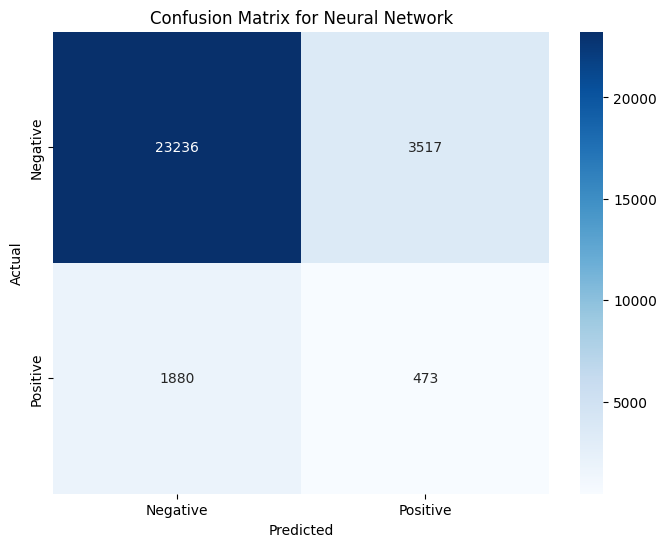

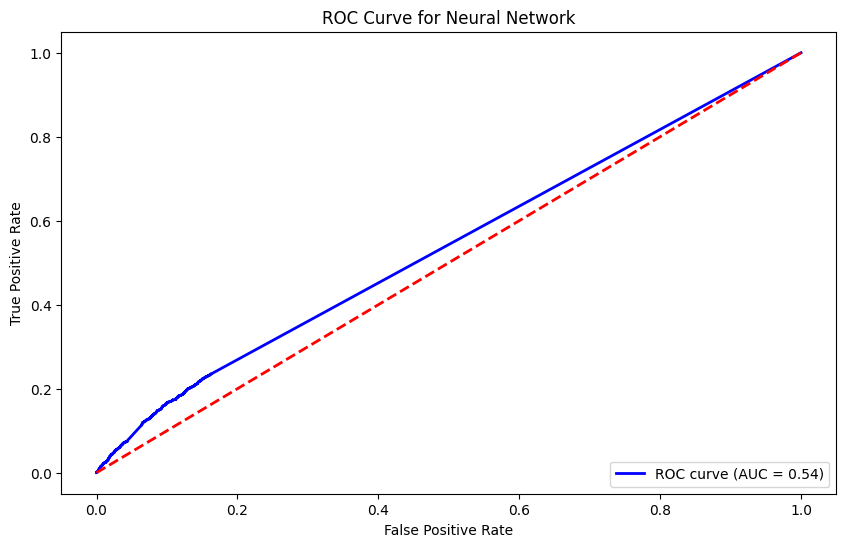

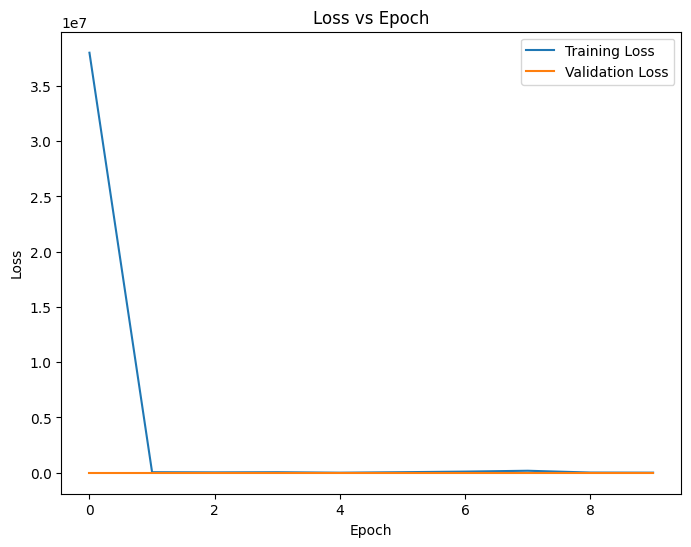

8186/8186 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step


In [ ]:
input_dim = X_train.shape[1]
neural_network_classifier = NeuralNetworkClassifier(input_dim, y_train)
y_pred_proba, y_value_pred_train_proba = neural_network_classifier.train_and_evaluate(X_train, X_test, y_train, y_test, epochs=10)

#best 2

Training and evaluating Neural Network...
Epoch 1/6
8186/8186 ━━━━━━━━━━━━━━━━━━━━ 54s 6ms/step - accuracy: 0.3285 - custom_metric: 0.0730 - loss: 215763376.0000 - val_accuracy: 0.0808 - val_custom_metric: 0.0796 - val_loss: 0.1736
Epoch 2/6
8186/8186 ━━━━━━━━━━━━━━━━━━━━ 79s 5ms/step - accuracy: 0.4038 - custom_metric: 0.0704 - loss: 14991.2041 - val_accuracy: 0.0808 - val_custom_metric: 0.0796 - val_loss: 0.1750
Epoch 3/6
8186/8186 ━━━━━━━━━━━━━━━━━━━━ 85s 6ms/step - accuracy: 0.3743 - custom_metric: 0.0724 - loss: 12793.0117 - val_accuracy: 0.9192 - val_custom_metric: 0.0000e+00 - val_loss: 0.1716
Epoch 4/6
8186/8186 ━━━━━━━━━━━━━━━━━━━━ 40s 5ms/step - accuracy: 0.5490 - custom_metric: 0.0618 - loss: 57.3072 - val_accuracy: 0.9192 - val_custom_metric: 0.0000e+00 - val_loss: 0.1687
Epoch 5/6
8186/8186 ━━━━━━━━━━━━━━━━━━━━ 44s 5ms/step - accuracy: 0.4737 - custom_metric: 0.0663 - loss: 51128.6680 - val_accuracy: 0.9192 - val_custom_metric: 0.0000e+00 - val_loss: 0.1706
Epoch 6/6
8186/

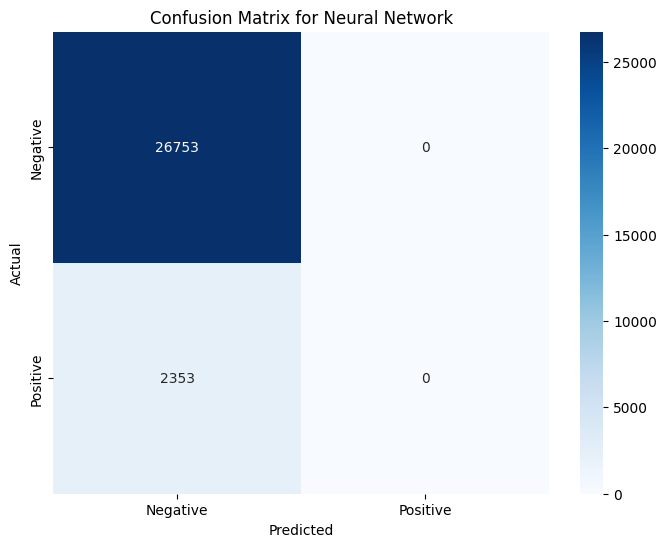

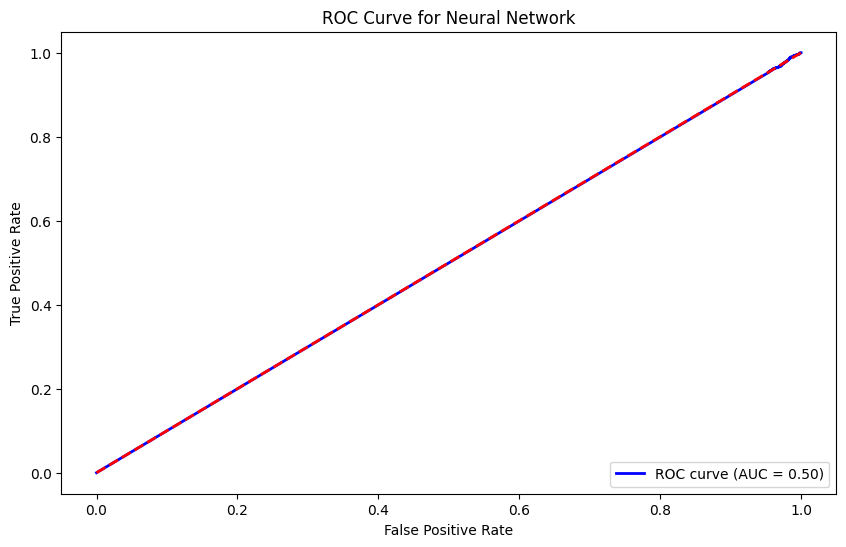

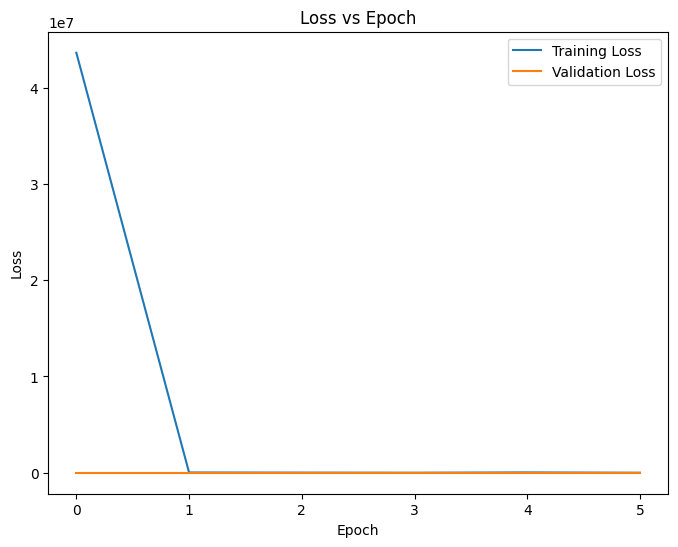

8186/8186 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step


In [ ]:
input_dim = X_train.shape[1]
neural_network_classifier = NeuralNetworkClassifier(input_dim, y_train)
y_pred_proba, y_value_pred_train_proba = neural_network_classifier.train_and_evaluate(X_train, X_test, y_train, y_test, epochs=6)

Training and evaluating Neural Network...
Epoch 1/10
8186/8186 ━━━━━━━━━━━━━━━━━━━━ 52s 6ms/step - accuracy: 0.5907 - custom_metric: 0.0698 - loss: 135064048.0000 - val_accuracy: 0.9192 - val_custom_metric: 0.0000e+00 - val_loss: 0.1700
Epoch 2/10
8186/8186 ━━━━━━━━━━━━━━━━━━━━ 73s 5ms/step - accuracy: 0.4227 - custom_metric: 0.0743 - loss: 35998.2500 - val_accuracy: 0.2654 - val_custom_metric: 0.0833 - val_loss: 0.1762
Epoch 3/10
8186/8186 ━━━━━━━━━━━━━━━━━━━━ 38s 5ms/step - accuracy: 0.2705 - custom_metric: 0.0849 - loss: 4115.8794 - val_accuracy: 0.2517 - val_custom_metric: 0.0834 - val_loss: 0.1725
Epoch 4/10
8186/8186 ━━━━━━━━━━━━━━━━━━━━ 45s 5ms/step - accuracy: 0.2963 - custom_metric: 0.0859 - loss: 13534.0449 - val_accuracy: 0.3187 - val_custom_metric: 0.0834 - val_loss: 0.1710
Epoch 5/10
8186/8186 ━━━━━━━━━━━━━━━━━━━━ 42s 5ms/step - accuracy: 0.3050 - custom_metric: 0.0866 - loss: 0.1719 - val_accuracy: 0.3239 - val_custom_metric: 0.0832 - val_loss: 0.1704
Epoch 6/10
8186/8186

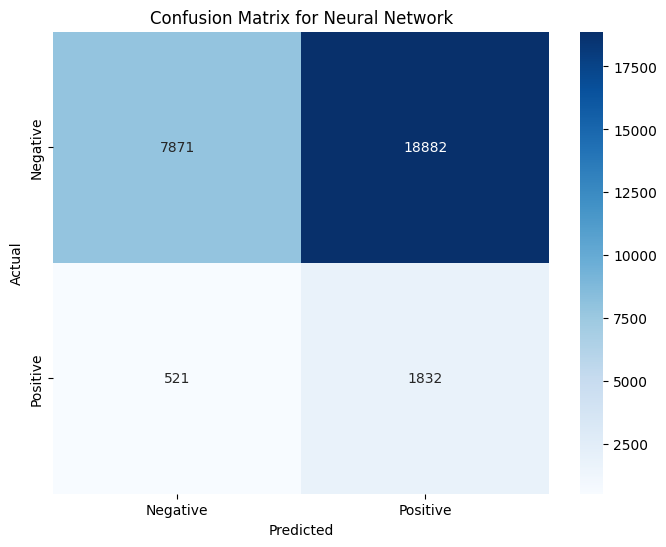

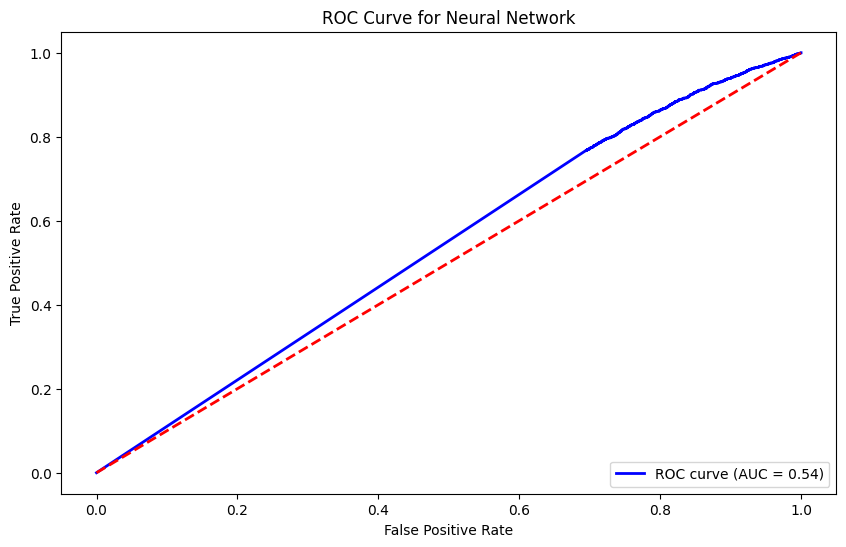

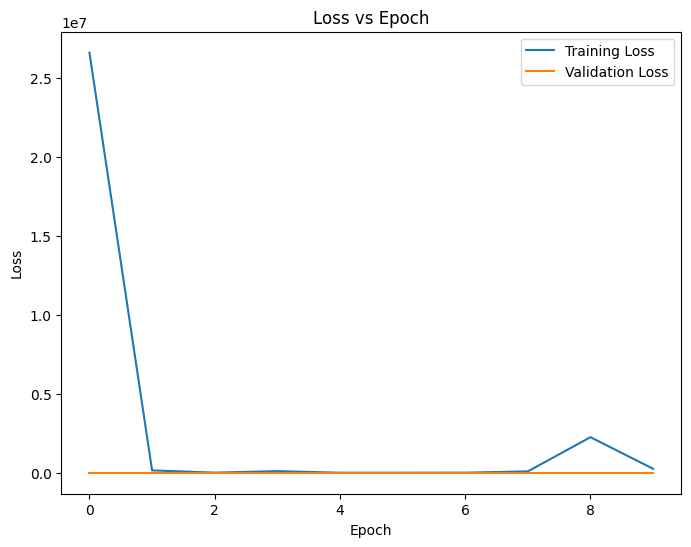

8186/8186 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step


In [ ]:
input_dim = X_train.shape[1]
neural_network_classifier = NeuralNetworkClassifier(input_dim, y_train)
y_pred_proba, y_value_pred_train_proba = neural_network_classifier.train_and_evaluate(X_train, X_test, y_train, y_test, epochs=10)

Training and evaluating Neural Network...
Epoch 1/15
8186/8186 ━━━━━━━━━━━━━━━━━━━━ 40s 5ms/step - accuracy: 0.6168 - custom_metric: 0.0670 - loss: 257296640.0000 - val_accuracy: 0.0808 - val_custom_metric: 0.0802 - val_loss: 0.1776
Epoch 2/15
8186/8186 ━━━━━━━━━━━━━━━━━━━━ 47s 6ms/step - accuracy: 0.4187 - custom_metric: 0.0751 - loss: 71147.1719 - val_accuracy: 0.2835 - val_custom_metric: 0.0830 - val_loss: 0.1703
Epoch 3/15
8186/8186 ━━━━━━━━━━━━━━━━━━━━ 78s 5ms/step - accuracy: 0.2719 - custom_metric: 0.0849 - loss: 66938.4141 - val_accuracy: 0.3502 - val_custom_metric: 0.0822 - val_loss: 0.1625
Epoch 4/15
8186/8186 ━━━━━━━━━━━━━━━━━━━━ 38s 5ms/step - accuracy: 0.3058 - custom_metric: 0.0867 - loss: 13136.8389 - val_accuracy: 0.3130 - val_custom_metric: 0.0838 - val_loss: 0.1709
Epoch 5/15
8186/8186 ━━━━━━━━━━━━━━━━━━━━ 40s 5ms/step - accuracy: 0.2999 - custom_metric: 0.0871 - loss: 0.1726 - val_accuracy: 0.3280 - val_custom_metric: 0.0831 - val_loss: 0.1690
Epoch 6/15
8186/8186 ━━

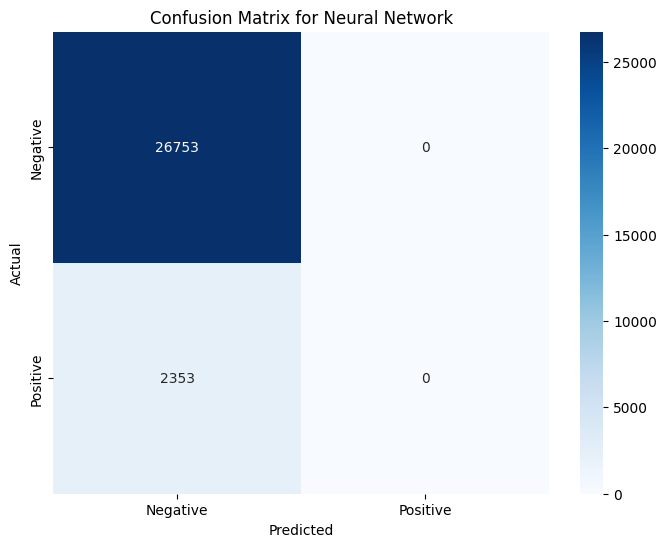

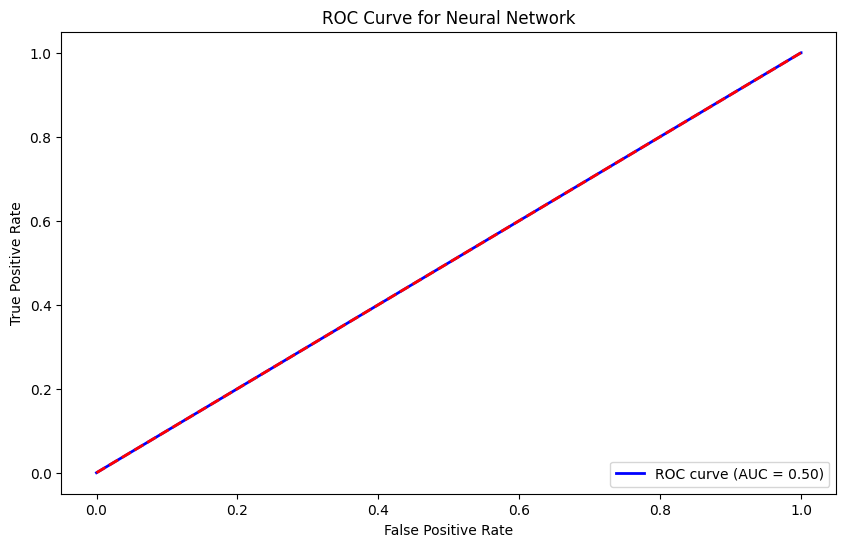

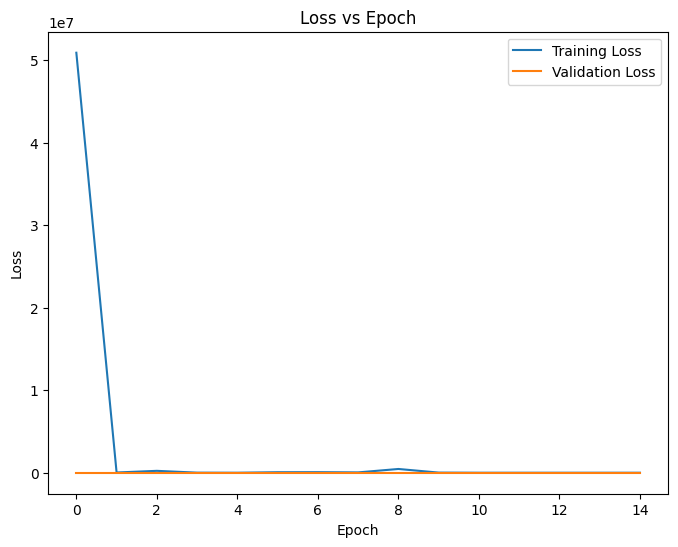

8186/8186 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step


In [ ]:
input_dim = X_train.shape[1]
neural_network_classifier = NeuralNetworkClassifier(input_dim, y_train)
y_pred_proba, y_value_pred_train_proba = neural_network_classifier.train_and_evaluate(X_train, X_test, y_train, y_test, epochs=15)

Training and evaluating Neural Network...
Epoch 1/6
8186/8186 ━━━━━━━━━━━━━━━━━━━━ 38s 4ms/step - accuracy: 0.7120 - custom_metric: 0.0603 - loss: 118792800.0000 - val_accuracy: 0.0808 - val_custom_metric: 0.0802 - val_loss: 0.1796
Epoch 2/6
8186/8186 ━━━━━━━━━━━━━━━━━━━━ 33s 4ms/step - accuracy: 0.3216 - custom_metric: 0.0776 - loss: 7133.9629 - val_accuracy: 0.0904 - val_custom_metric: 0.0802 - val_loss: 0.1747
Epoch 3/6
8186/8186 ━━━━━━━━━━━━━━━━━━━━ 45s 5ms/step - accuracy: 0.5352 - custom_metric: 0.0682 - loss: 13745.4902 - val_accuracy: 0.0835 - val_custom_metric: 0.0802 - val_loss: 0.1782
Epoch 4/6
8186/8186 ━━━━━━━━━━━━━━━━━━━━ 39s 5ms/step - accuracy: 0.5782 - custom_metric: 0.0672 - loss: 0.1720 - val_accuracy: 0.9192 - val_custom_metric: 0.0000e+00 - val_loss: 0.1719
Epoch 5/6
8186/8186 ━━━━━━━━━━━━━━━━━━━━ 41s 5ms/step - accuracy: 0.4041 - custom_metric: 0.0758 - loss: 0.1737 - val_accuracy: 0.1091 - val_custom_metric: 0.0803 - val_loss: 0.1764
Epoch 6/6
8186/8186 ━━━━━━━━━

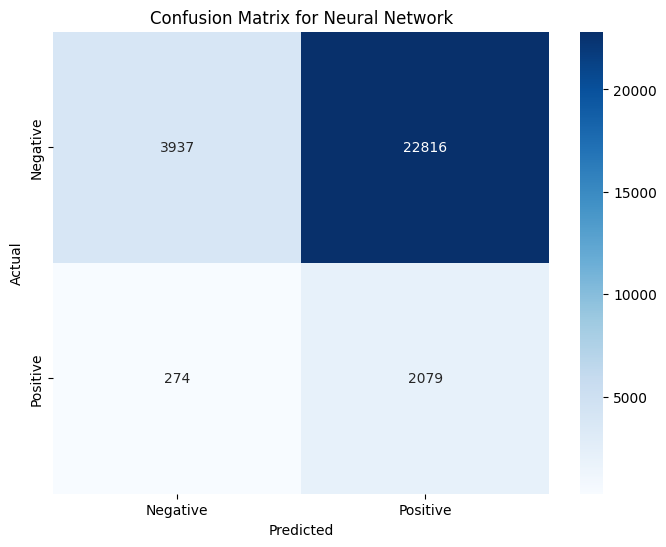

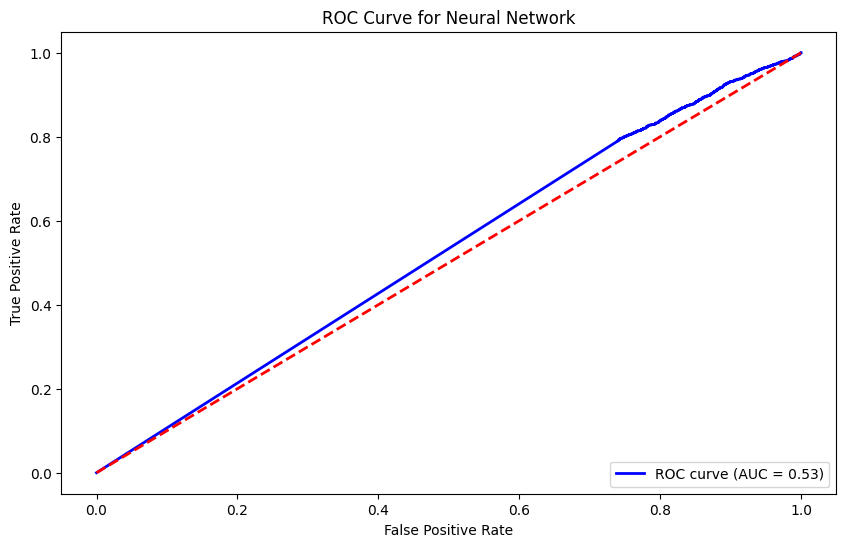

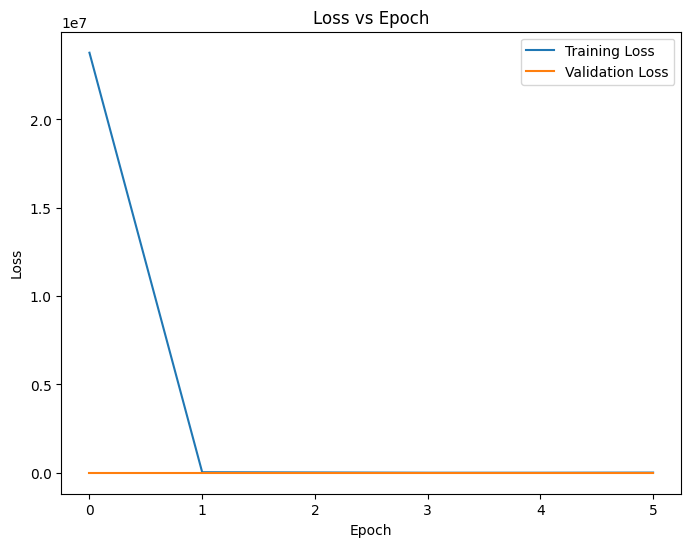

8186/8186 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step


In [ ]:
input_dim = X_train.shape[1]
neural_network_classifier = NeuralNetworkClassifier(input_dim, y_train)
y_pred_proba, y_value_pred_train_proba = neural_network_classifier.train_and_evaluate(X_train, X_test, y_train, y_test, epochs=6)

In [ ]:
# from imblearn.ensemble import BalancedRandomForestClassifier

#    brf = BalancedRandomForestClassifier(n_estimators=100, random_state=42)
#    brf.fit(X_train, y_train)

In [ ]:
# model = Sequential()
# # Input layer (256 features)
# model.add(Dense(256, input_dim=X_train.shape[1], activation='relu'))  # First hidden layer with 256 neurons
# # Hidden layers
# model.add(Dense(128, activation='relu'))  # Second hidden layer with 128 neurons
# model.add(Dropout(0.6))  # Dropout to prevent overfitting
# model.add(Dense(64, activation='relu'))  # Third hidden layer with 64 neurons
# model.add(Dropout(0.6))  # Dropout
# # Output layer (binary classification, single output unit)
# model.add(Dense(1, activation='sigmoid'))  # Sigmoid for binary classification
# # Compile the model with binary cross-entropy loss and Adam optimizer
# model.compile(optimizer=Adam(learning_rate=0.001),
#               loss='binary_crossentropy',
#               metrics=['accuracy'])
# # Summary of the model architecture
# model.summary()


# # Calculate class weights for the imbalance
# class_weights = compute_class_weight('balanced', classes=[0, 1], y=y_train)
# class_weight_dict = {0: class_weights[0], 1: class_weights[1]}
# # Compile the model with binary cross-entropy loss
# model.compile(optimizer=Adam(learning_rate=0.001),
#               loss=BinaryCrossentropy(),
#               metrics=['accuracy'])
# # Early stopping to avoid overfitting
# early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
# # Train the model
# history = model.fit(X_train, y_train,
#                     epochs=50,
#                     batch_size=32,
#                     validation_data=(X_test, y_test),
#                     class_weight=class_weight_dict,  # Apply class weights here
#                     callbacks=[early_stopping],
#                     verbose=1)

# # Evaluate the model on the test set
# test_loss, test_acc = model.evaluate(X_test, y_test)
# print(f'Test Accuracy: {test_acc:.4f}, Test Loss: {test_loss:.4f}')

In [ ]:
@keras.saving.register_keras_serializable()
class CustomMetric(tf.keras.metrics.Metric):
    def __init__(self, name='custom_metric', beta=1.0, **kwargs):
        super(CustomMetric, self).__init__(name=name, **kwargs)
        self.beta = beta
        self.precision = tf.keras.metrics.Precision()
        self.recall = tf.keras.metrics.Recall()

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_pred_rounded = tf.round(y_pred)
        self.precision.update_state(y_true, y_pred_rounded, sample_weight)
        self.recall.update_state(y_true, y_pred_rounded, sample_weight)

    def result(self):
        precision_result = self.precision.result()
        recall_result = self.recall.result()
        beta_squared = self.beta ** 2
        f1_score = (1 + beta_squared) * (precision_result * recall_result) / \
                   (beta_squared * precision_result + recall_result + 1e-7)
        return f1_score

    def reset_state(self):
        self.precision.reset_state()
        self.recall.reset_state()


# Neural Network Classifier
class NeuralNetworkClassifier:
    def __init__(self, input_dim, y_train):
        self.class_weights = self.calculate_class_weights(y_train)
        self.model = self.build_model(input_dim)

    @staticmethod
    def calculate_class_weights(y_train):
        class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
        return {i: w for i, w in enumerate(class_weights)}

    def build_model(self, input_dim):
        model = Sequential([
            Input(shape=(input_dim,)),
            Dense(128, activation='relu'),
            Dropout(0.5),
            Dense(64, activation='relu'),
            Dropout(0.5),
            Dense(32, activation='relu'),
            Dropout(0.3),
            Dense(1, activation='sigmoid')
        ])
        return model

    def train_and_evaluate(self, X_train, X_test, y_train, y_test, epochs=50, batch_size=32, beta=1.0):

        # Convert y_train and y_test to NumPy arrays for compatibility
        if isinstance(y_train, pd.Series) or isinstance(y_train, pd.DataFrame):
            y_train = y_train.values.flatten()
        if isinstance(y_test, pd.Series) or isinstance(y_test, pd.DataFrame):
            y_test = y_test.values.flatten()
        # Compile the model
        focal_loss = BinaryFocalCrossentropy(alpha=0.3, gamma=2.0)
        custom_metric = CustomMetric(beta=beta)

        self.model.compile(
            optimizer=Adam(learning_rate=0.001),
            loss=focal_loss,
            metrics=['accuracy', custom_metric]
        )

        # Callbacks
        # early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
        # model_checkpoint = ModelCheckpoint(
        #     'best_model.h5', save_best_only=True, monitor='val_loss', mode='min'
        # )
        early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
        model_checkpoint = ModelCheckpoint(
            'best_model.keras', save_best_only=True, monitor='val_loss', mode='min'  # Changed file extension to .keras
        )
        # Train the model
        history = self.model.fit(
            X_train, y_train,
            epochs=epochs,
            batch_size=batch_size,
            validation_data=(X_test, y_test),
            class_weight=self.class_weights,
            callbacks=[early_stopping, model_checkpoint],
            verbose=1
        )

        # Evaluate the model
        test_loss, test_accuracy, custom_metric_value = self.model.evaluate(X_test, y_test, verbose=0)
        print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}, Custom Metric (F1): {custom_metric_value:.4f}")

        # Predict probabilities
        y_pred_proba = self.model.predict(X_test)
        roc_auc = roc_auc_score(y_test, y_pred_proba)

        print(f"ROC-AUC Score: {roc_auc:.4f}")

        # Confusion Matrix
        y_pred = (y_pred_proba > 0.5).astype(int)
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title('Confusion Matrix')
        plt.show()

        # ROC Curve
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        plt.figure(figsize=(10, 6))
        plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.4f})')
        plt.plot([0, 1], [0, 1], 'r--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve')
        plt.legend(loc="lower right")
        plt.show()

        # Loss vs Epoch Plot
        plt.figure(figsize=(8, 6))
        plt.plot(history.history['loss'], label='Training Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.title('Loss vs Epoch')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()

        return y_pred_proba


# Example usage:
# nn_classifier = NeuralNetworkClassifier(input_dim=X_train.shape[1], y_train=y_train)
# y_pred_proba = nn_classifier.train_and_evaluate(X_train, X_test, y_train, y_test, epochs=50, batch_size=32, beta=1.5)


In [ ]:
X_scaled = X.copy()
X_scaled.fillna(-(10e10-1), inplace=True)

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_scaled)

In [ ]:
X_scaled

array([[-0.26543559, -0.19848803, -0.26543559, ...,  0.        ,
        -0.00945185, -0.00945185],
       [-0.26543559, -0.19848803, -0.26543559, ...,  0.        ,
        -0.00945185, -0.00945185],
       [-0.26543559, -0.19848803, -0.26543559, ...,  0.        ,
        -0.00945185, -0.00945185],
       ...,
       [-0.26543559, -0.19848803, -0.26543559, ...,  0.        ,
        -0.00945185, -0.00945185],
       [-0.26543559, -0.19848803, -0.26543559, ...,  0.        ,
        -0.00945185, -0.00945185],
       [-0.26543559, -0.19848803, -0.26543559, ...,  0.        ,
        -0.00945185, -0.00945185]])

In [ ]:
y


,TARGET_max
0,1.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
291052,0.0
291053,0.0
291054,0.0
291055,1.0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_train

array([[-0.26543559, -0.19848803, -0.26543559, ...,  0.        ,
        -0.00945185, -0.00945185],
       [-0.26543559, -0.19848803, -0.26543559, ...,  0.        ,
        -0.00945185, -0.00945185],
       [-0.26543559, -0.19848803, -0.26543559, ...,  0.        ,
        -0.00945185, -0.00945185],
       ...,
       [-0.26543559, -0.19848803, -0.26543559, ...,  0.        ,
        -0.00945185, -0.00945185],
       [-0.26543559, -0.19848803, -0.26543559, ...,  0.        ,
        -0.00945185, -0.00945185],
       [-0.26543559, -0.19848803, -0.26543559, ...,  0.        ,
        -0.00945185, -0.00945185]])

Epoch 1/50
7277/7277 ━━━━━━━━━━━━━━━━━━━━ 32s 4ms/step - accuracy: 0.5491 - custom_metric: 0.1482 - loss: 0.1953 - val_accuracy: 0.6775 - val_custom_metric: 0.1749 - val_loss: 0.1718
Epoch 2/50
7277/7277 ━━━━━━━━━━━━━━━━━━━━ 27s 4ms/step - accuracy: 0.7071 - custom_metric: 0.1623 - loss: 0.1709 - val_accuracy: 0.7355 - val_custom_metric: 0.1777 - val_loss: 0.1704
Epoch 3/50
7277/7277 ━━━━━━━━━━━━━━━━━━━━ 42s 4ms/step - accuracy: 0.6994 - custom_metric: 0.1623 - loss: 0.1727 - val_accuracy: 0.7701 - val_custom_metric: 0.1759 - val_loss: 0.1680
Epoch 4/50
7277/7277 ━━━━━━━━━━━━━━━━━━━━ 25s 3ms/step - accuracy: 0.7387 - custom_metric: 0.1573 - loss: 0.1733 - val_accuracy: 0.7517 - val_custom_metric: 0.1762 - val_loss: 0.1734
Epoch 5/50
7277/7277 ━━━━━━━━━━━━━━━━━━━━ 27s 4ms/step - accuracy: 0.7495 - custom_metric: 0.1573 - loss: 0.1721 - val_accuracy: 0.8117 - val_custom_metric: 0.1673 - val_loss: 0.1696
Epoch 6/50
7277/7277 ━━━━━━━━━━━━━━━━━━━━ 45s 4ms/step - accuracy: 0.7409 - custom_me

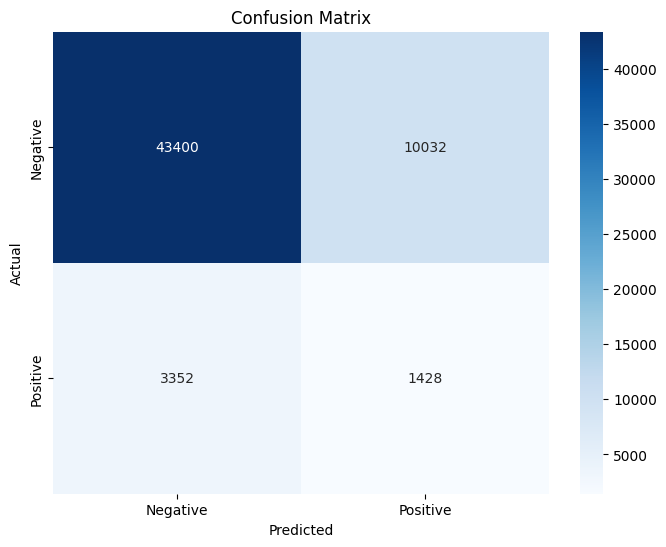

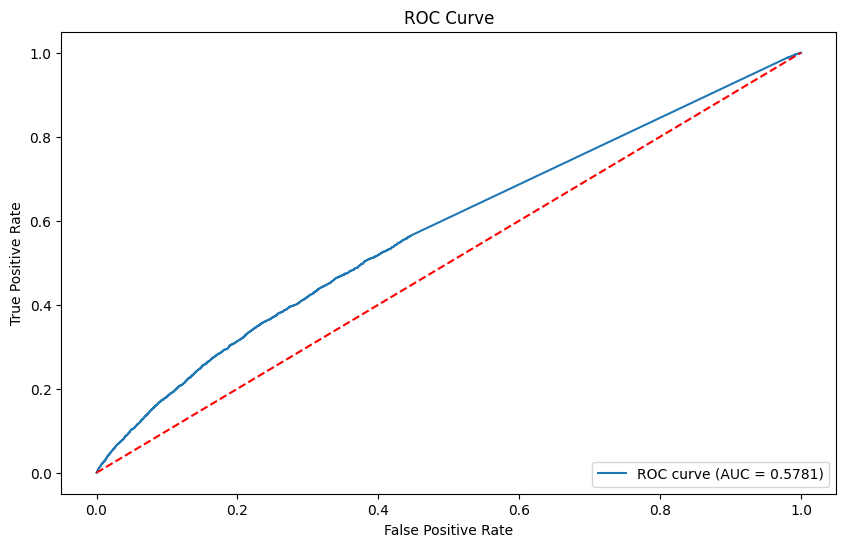

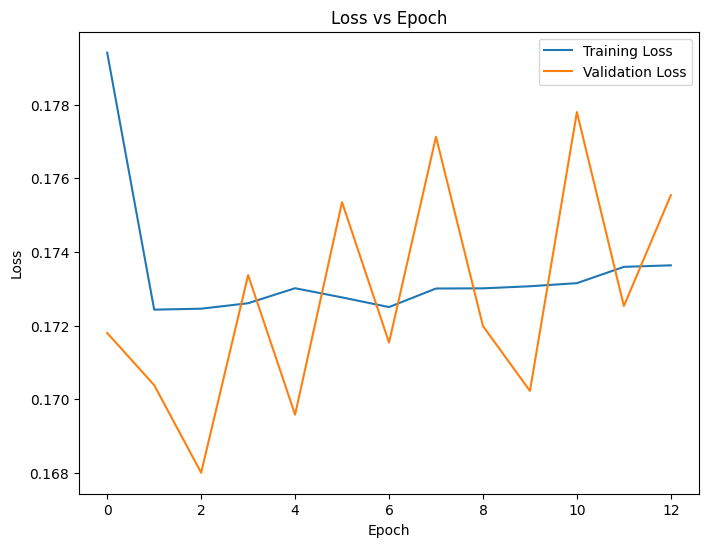

In [ ]:
input_dim = X_train.shape[1]
# nn_classifier = NeuralNetworkClassifier(input_dim=X_train.shape[1], y_train=y_train)
neural_network_classifier = NeuralNetworkClassifier(input_dim, y_train)
y_pred_proba = neural_network_classifier.train_and_evaluate(X_train, X_test, y_train, y_test, epochs=50)

In [ ]:
from tensorflow.keras.models import load_model

# Load the model
model = load_model('best_model.keras', custom_objects={'CustomMetric': CustomMetric})

1820/1820 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
Accuracy: 0.7701
              precision    recall  f1-score   support

         0.0       0.93      0.81      0.87     53432
         1.0       0.12      0.30      0.18      4780

    accuracy                           0.77     58212
   macro avg       0.53      0.56      0.52     58212
weighted avg       0.86      0.77      0.81     58212



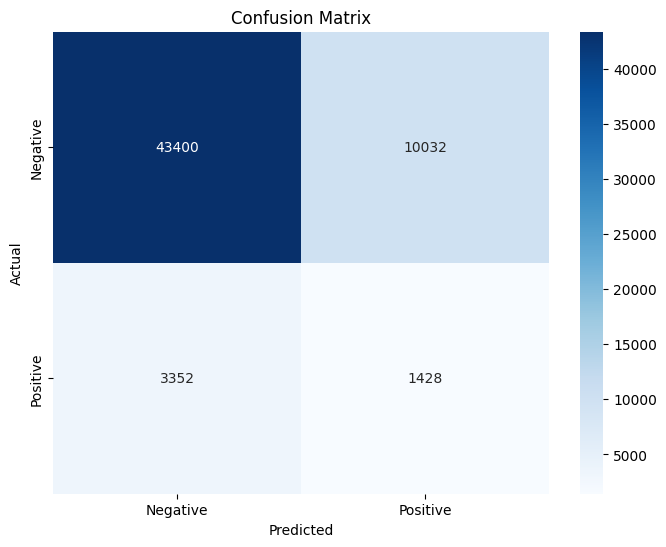

In [ ]:
# Assuming X_test and y_test are available
y_pred_proba = model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int)  # Convert probabilities to predictions

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Classification Report (includes accuracy)
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

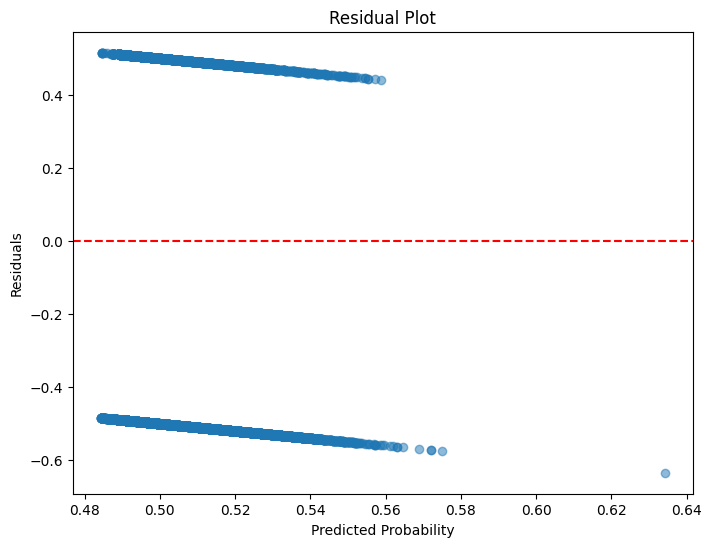

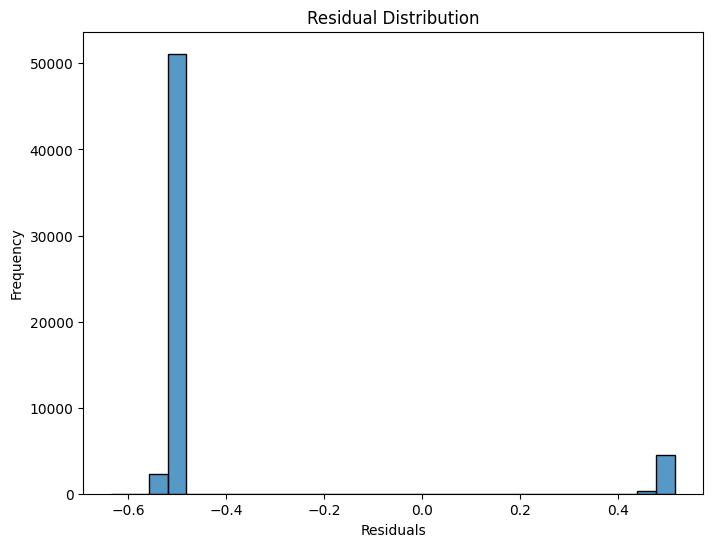

In [ ]:
# Calculate Residuals
residuals = y_test - y_pred_proba.flatten()  # Flatten y_pred_proba for compatibility

# Residual Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_proba, residuals, alpha=0.5)
plt.xlabel('Predicted Probability')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='red', linestyle='--')  # Add a horizontal line at 0
plt.show()

# Residual Distribution
plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=30)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residual Distribution')
plt.show()

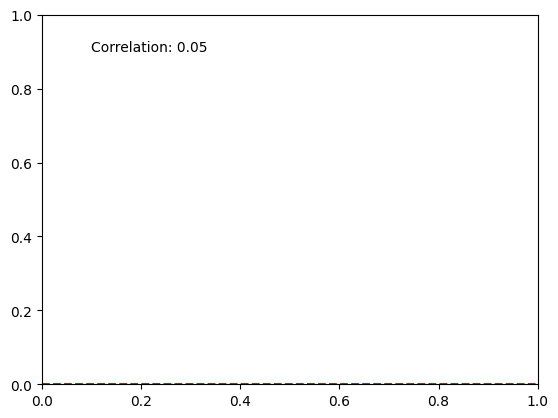

In [ ]:
correlation = np.corrcoef(y_pred_proba.flatten(), residuals)[0, 1]
plt.text(0.1, 0.9, f'Correlation: {correlation:.2f}', transform=plt.gca().transAxes)

plt.axhline(y=0, color='red', linestyle='--')  # Add horizontal line at 0
plt.show()

In [ ]:
import joblib

class ModelPersistence:
    def __init__(self, filename):
        self.filename = filename

    def dump(self, obj):
        """Saves an object to a file using joblib."""
        joblib.dump(obj, self.filename)
        print(f"Object saved to {self.filename}")

    def load(self):
        """Loads an object from a file using joblib."""
        try:
            obj = joblib.load(self.filename)
            print(f"Object loaded from {self.filename}")
            return obj
        except FileNotFoundError:
            print(f"File {self.filename} not found.")
            return None

In [ ]:
persistence = ModelPersistence('standard_scaler_prev.pkl')
persistence.dump(scaler)

Object saved to standard_scaler_prev.pkl
